<a href="https://colab.research.google.com/github/rushikeshnakhate/PortfoliOpt/blob/master/post_processing_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [119]:
import yfinance as yf
import pandas as pd
import numpy as np
from pathlib import Path
import os
output_dir = Path("/content/drive/MyDrive/")
import matplotlib.pyplot as plt
# !pip install tqdm
# !pip install PyPortfolioOpt
# !pip install tabulate
# !pip install dtale
# !pip install -q data-table
# !pip install dtale
import dtale
import scipy.optimize as sci_opt
from tqdm import tqdm  # Import the tqdm progress b
from google.colab import data_table

In [120]:
optimization_pkl_filepath = os.path.join(output_dir, "optimization.pkl")
post_processing_wright_pkl_filepath = os.path.join(output_dir, "post_processing_wright.pkl")
performance_pkl_filepath = os.path.join(output_dir, "performance.pkl")
data_pkl_filepath = os.path.join(output_dir, "data.pkl")
expected_return_pkl_filepath = os.path.join(output_dir, "expected_return.pkl")

In [121]:
start_date = '2024-01-01'
end_date = '2024-01-30'
previous_end_date = '2024-01-29'
data = pd.read_pickle(data_pkl_filepath)
expected_return_df = pd.read_pickle(expected_return_pkl_filepath)
optimized_df = pd.read_pickle(optimization_pkl_filepath)
post_processing_wright_df = pd.read_pickle(post_processing_wright_pkl_filepath)
performance_df = pd.read_pickle(performance_pkl_filepath)

In [122]:
from google.colab import data_table

# Assuming df is your DataFrame
def clean_metadata(value):
    if isinstance(value, pd.Series):
        return value.values  # Extract just the values
    elif isinstance(value, list):
        return [str(v) for v in value]  # Convert each element to string for clarity
    return value

def extract_value(value):
    # Check if the value is a list and has only one element, then extract it
    # print(type(value))
    if isinstance(value, (np.ndarray, list)) and len(value) == 1:
        return value[0]
    # elif isinstance(value, tuple) and len(value) >= 2:
    #   return value[1]
    return value  # Return the value as-is if not a list

# Apply this function to every cell in the DataFrame
df1 = performance_df.applymap(clean_metadata)
performance_df_cleaned = df1.applymap(extract_value)

<ipython-input-122-07a70a02216b>:21: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

<ipython-input-122-07a70a02216b>:22: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



In [123]:
# data_table.DataTable(performance_df_cleaned.head(10))

In [137]:
df = performance_df_cleaned.copy()

# Calculate the differences for Annual Return, Volatility, and Sharpe Ratio
df['diff_Greedy_Return'] = abs(df['Expected Annual Return'] - df['GreedyPortfolio_Return'])
df['diff_Lp_Return'] = abs(df['Expected Annual Return'] - df['LpPortfolio_Return'])

df['diff_Greedy_Volatility'] = abs(df['Annual Volatility'] - df['GreedyPortfolio_Volatility'])
df['diff_Lp_Volatility'] = abs(df['Annual Volatility'] - df['LpPortfolio_Volatility'])

df['diff_Greedy_Sharpe'] = abs(df['Sharpe Ratio'] - df['GreedyPortfolio_Sharpe'])
df['diff_Lp_Sharpe'] = abs(df['Sharpe Ratio'] - df['LpPortfolio_Sharpe'])

# Filter portfolios where the differences are all less than 10
filtered_df = df[
    (df['diff_Greedy_Return'] < 10) & (df['diff_Lp_Return'] < 10) &
    (df['diff_Greedy_Volatility'] <400) & (df['diff_Lp_Volatility'] < 400) &
    (df['diff_Greedy_Sharpe'] < 10) & (df['diff_Lp_Sharpe'] < 10)
]

# Drop the difference columns for clarity
filtered_df = filtered_df.drop(columns=[
    'diff_Greedy_Return', 'diff_Lp_Return',
    'diff_Greedy_Volatility', 'diff_Lp_Volatility',
    'diff_Greedy_Sharpe', 'diff_Lp_Sharpe'
])

# Display the filtered DataFrame
filtered_df = filtered_df.reset_index(drop=True)
filtered_df.index.name = 'SrNo'
filtered_df = filtered_df.reset_index()
filtered_df

SrNo               Expected Return Type  \
0        0                 CAGRMeanHistorical   
1        1                 CAGRMeanHistorical   
2        2                 CAGRMeanHistorical   
3        3                 CAGRMeanHistorical   
4        4                 CAGRMeanHistorical   
...    ...                                ...   
1453  1453                     BlackLitterman   
1454  1454                     BlackLitterman   
1455  1455                     BlackLitterman   
1456  1456       monte_carlo_max_sharpe_ratio   
1457  1457  monte_carlo_min_annual_volatility   

                             Risk Model                          Optimizer  \
0                      SampleCovariance              MADRiskFolioOptimizer   
1                      SampleCovariance              MSVRiskFolioOptimizer   
2                      SampleCovariance             SLPMRiskFolioOptimizer   
3                      SampleCovariance             CVaRRiskFolioOptimizer   
4                      SampleCovariance             EVaRRiskFolioOptimizer   
...                                 ...                                ...   
1453           RegimeSwitchingRiskModel              ADDRiskFolioOptimizer   
1454           RegimeSwitchingRiskModel             CDaRRiskFolioOptimizer   
1455           RegimeSwitchingRiskModel             EDaRRiskFolioOptimizer   
1456       monte_carlo_max_sharpe_ratio       monte_carlo_max_sharpe_ratio   
1457  monte_carlo_min_annual_volatility  monte_carlo_min_annual_volatility   

                                                Weights  \
0     {'ASIANPAINT.NS': 8.892118173752851e-11, 'BAJA...   
1     {'ASIANPAINT.NS': 1.4086670474403574e-09, 'BAJ...   
2     {'ASIANPAINT.NS': 1.0822894317589124e-09, 'BAJ...   
3     {'ASIANPAINT.NS': 9.426825439178089e-10, 'BAJA...   
4     {'ASIANPAINT.NS': 9.547793777788404e-10, 'BAJA...   
...                                                 ...   
1453  {'ASIANPAINT.NS': 2.2482097510002173e-11, 'BAJ...   
1454  {'ASIANPAINT.NS': 7.174353269048427e-11, 'BAJA...   
1455  {'ASIANPAINT.NS': 3.9724883230756183e-10, 'BAJ...   
1456  {'ASIANPAINT.NS': 0.06418735643324315, 'BAJAJF...   
1457  {'ASIANPAINT.NS': 0.08134294971942214, 'BAJAJF...   

      Expected Annual Return  Annual Volatility  Sharpe Ratio  \
0                   0.003983           0.006828      0.583401   
1                   0.006368           0.009867      0.645351   
2                   0.006303           0.011533      0.546457   
3                   0.004567           0.009663      0.472629   
4                   0.004567           0.009663      0.472629   
...                      ...                ...           ...   
1453                0.005977           0.010041      0.595289   
1454                0.004906           0.010643      0.460992   
1455                0.004906           0.010643      0.460992   
1456                0.556491           0.139717      3.982999   
1457               -0.089501           0.137387     -0.651456   

                      Allocation_GreedyPortfolio_weight  \
0     {'ICICIBANK.NS': 288, 'BPCL.NS': 907, 'CIPLA.N...   
1     {'BHARTIARTL.NS': 263, 'RELIANCE.NS': 59, 'ONG...   
2     {'BHARTIARTL.NS': 292, 'TITAN.NS': 44, 'INFY.N...   
3     {'INFY.NS': 136, 'TITAN.NS': 54, 'CIPLA.NS': 1...   
4     {'INFY.NS': 136, 'TITAN.NS': 54, 'CIPLA.NS': 1...   
...                                                 ...   
1453  {'BHARTIARTL.NS': 241, 'BPCL.NS': 766, 'INFY.N...   
1454  {'INFY.NS': 159, 'TITAN.NS': 60, 'ONGC.NS': 72...   
1455  {'INFY.NS': 159, 'TITAN.NS': 60, 'ONGC.NS': 72...   
1456  {'BPCL.NS': 490, 'BAJFINANCE.NS': 15, 'BHARTIA...   
1457  {'BHARTIARTL.NS': 75, 'ASIANPAINT.NS': 28, 'HC...   

      Allocation_GreedyPortfolio_remaining_amount  \
0                                      101.644592   
1                                       97.045700   
2                                       29.845230   
3                                       29.712265   
4               

In [138]:
# data_table.DataTable(filtered_df)

In [181]:
# print(filtered_df.iloc[1137])

In [160]:
# Update the ranking functions to return the top 10 for best and worst portfolios
target_columns = ['Sharpe Ratio','Annual Volatility','Expected Return Type', 'Risk Model', 'Optimizer', 'Expected Annual Return', 'GreedyPortfolio_Return', 'LpPortfolio_Return', 'SrNo','Weights','Allocation_GreedyPortfolio_weight','Allocation_LpPortfolio_weight','Allocation_GreedyPortfolio_remaining_amount','Allocation_LpPortfolio_remaining_amount']
# Function to rank portfolios based on 'Expected Annual Return', 'GreedyPortfolio_Return', and 'LpPortfolio_Return'
def rank_by_annual_return(df1):
    df = df1.copy()
    # Sort by 'Expected Annual Return'
    df_ranked = df[target_columns]
    best_portfolio_return = df_ranked.nlargest(10, 'Expected Annual Return')  # Top 10 highest return
    worst_portfolio_return = df_ranked.nsmallest(10, 'Expected Annual Return')  # Top 10 lowest return

    return best_portfolio_return, worst_portfolio_return

# Function to rank portfolios based on 'Annual Volatility', 'GreedyPortfolio_Volatility', and 'LpPortfolio_Volatility'
def rank_by_volatility(df1):
    df = df1.copy()
    # Sort by 'Annual Volatility'
    df_ranked = df[target_columns]
    best_portfolio_vol = df_ranked.nsmallest(10, 'Annual Volatility')  # Top 10 smallest volatility (best)
    worst_portfolio_vol = df_ranked.nlargest(10, 'Annual Volatility')  # Top 10 largest volatility (worst)

    return best_portfolio_vol, worst_portfolio_vol

# Function to rank portfolios based on 'Sharpe Ratio', 'GreedyPortfolio_Sharpe', and 'LpPortfolio_Sharpe'
def rank_by_sharpe_ratio(df1):
    df = df1.copy()
    # Sort by 'Sharpe Ratio'
    df_ranked = df[target_columns]
    best_portfolio_sharpe = df_ranked.nlargest(10, 'Sharpe Ratio')  # Top 10 highest Sharpe ratios (best)
    worst_portfolio_sharpe = df_ranked.nsmallest(10, 'Sharpe Ratio')  # Top 10 lowest Sharpe ratios (worst)

    return best_portfolio_sharpe, worst_portfolio_sharpe

# Assuming filtered_df is already defined, executing the updated functions
best_return, worst_return = rank_by_annual_return(filtered_df)
best_volatility, worst_volatility = rank_by_volatility(filtered_df)
best_sharpe, worst_sharpe = rank_by_sharpe_ratio(filtered_df)

best_return, worst_return, best_volatility, worst_volatility, best_sharpe, worst_sharpe


# # Executing the functions
best_return, worst_return = rank_by_annual_return(filtered_df)
best_volatility, worst_volatility = rank_by_volatility(filtered_df)
best_sharpe, worst_sharpe = rank_by_sharpe_ratio(filtered_df)

In [194]:
def plot(df1):
  df = df1.copy()
  # Loop over each row in the DataFrame and plot the pie charts
  for index, row in df.iterrows():
    print(f"Row {index + 1}:")
    plot_portfolio_pie_charts(row,index)


# Function to plot 3 pie charts for each row
def plot_portfolio_pie_charts(row, index):
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # Plot Weights pie chart
    axes[0].pie(row['Weights'].values(), labels=row['Weights'].keys(), autopct='%1.1f%%', startangle=90, textprops={'fontsize': 8})
    axes[0].set_title('Weights', fontsize=10)

    # Plot Allocation_GreedyPortfolio_weight pie chart
    axes[1].pie(row['Allocation_GreedyPortfolio_weight'].values(), labels=row['Allocation_GreedyPortfolio_weight'].keys(), autopct='%1.1f%%', startangle=90, textprops={'fontsize': 8})
    axes[1].set_title('Greedy Portfolio Allocation', fontsize=10)

    # Plot Allocation_LpPortfolio_weight pie chart
    axes[2].pie(row['Allocation_LpPortfolio_weight'].values(), labels=row['Allocation_LpPortfolio_weight'].keys(), autopct='%1.1f%%', startangle=90, textprops={'fontsize': 8})
    axes[2].set_title('LP Portfolio Allocation', fontsize=10)

    # Add ID and Type information next to the chart
    plt.figtext(0.1, -0.05, f"ID: {index}, Type: {row['Expected Return Type']}, Risk Model: {row['Risk Model']}, Optimizer: {row['Optimizer']}", fontsize=10)

    # Display the pie charts
    plt.tight_layout()
    plt.show()


In [200]:
def plot_bar(df1):
  df = df1.copy()
  # Loop over each row in the DataFrame and plot the pie charts
  for index, row in df.iterrows():
    print(f"Row {index + 1}:")
    plot_portfolio_charts(row,index)

# Updated function to plot bar charts and rotate ticker labels by 45 degrees
def plot_portfolio_charts(row, index):
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))

    # Plot Weights bar chart
    axes[0].bar(row['Weights'].keys(), row['Weights'].values())
    axes[0].set_title('Weights', fontsize=10)
    axes[0].tick_params(axis='x', rotation=45)

    # Plot Allocation_GreedyPortfolio_weight bar chart
    axes[1].bar(row['Allocation_GreedyPortfolio_weight'].keys(), row['Allocation_GreedyPortfolio_weight'].values())
    axes[1].set_title('Greedy Portfolio Allocation', fontsize=10)
    axes[1].tick_params(axis='x', rotation=45)

    # Plot Allocation_LpPortfolio_weight bar chart
    axes[2].bar(row['Allocation_LpPortfolio_weight'].keys(), row['Allocation_LpPortfolio_weight'].values())
    axes[2].set_title('LP Portfolio Allocation', fontsize=10)
    axes[2].tick_params(axis='x', rotation=45)

    # Add ID and Type information, and Return information next to the chart
    return_info = f"""
    ID: {index}, Type: {row['Expected Return Type']}, Risk Model: {row['Risk Model']}, Optimizer: {row['Optimizer']}
    Expected Annual Return: {row['Expected Annual Return']}, GreedyPortfolio_Return: {row['GreedyPortfolio_Return']}, LpPortfolio_Return: {row['LpPortfolio_Return']}
    """
    plt.figtext(0.1, -0.1, return_info, fontsize=10)

    # Display the bar charts
    plt.tight_layout()
    plt.show()


Row 874:


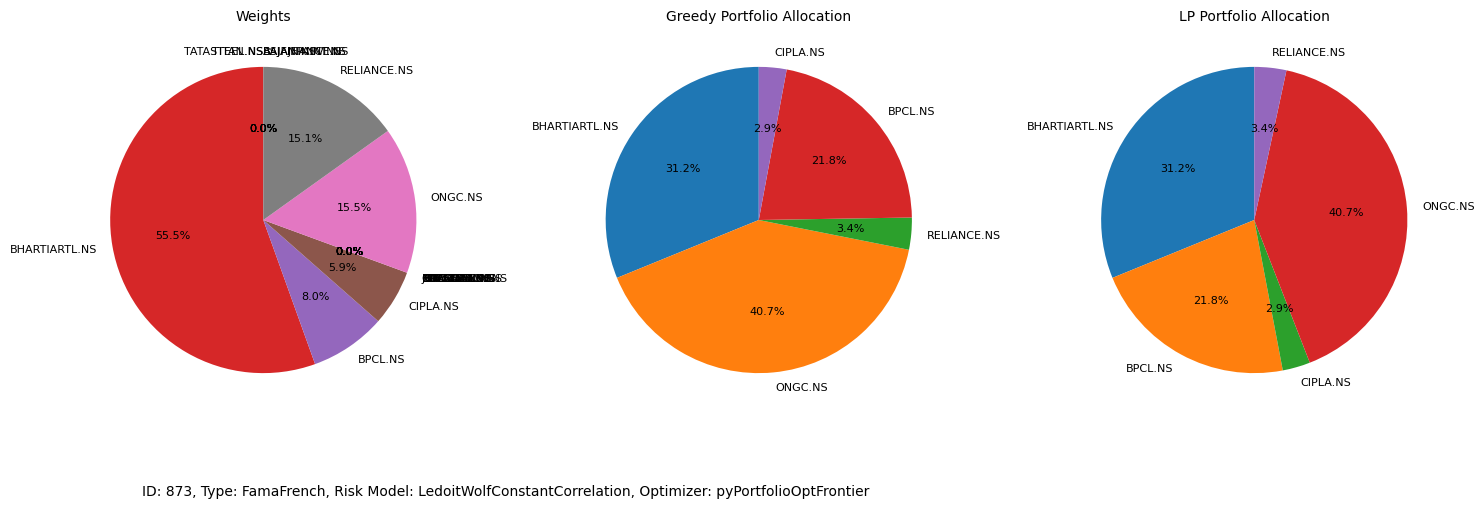

Row 221:


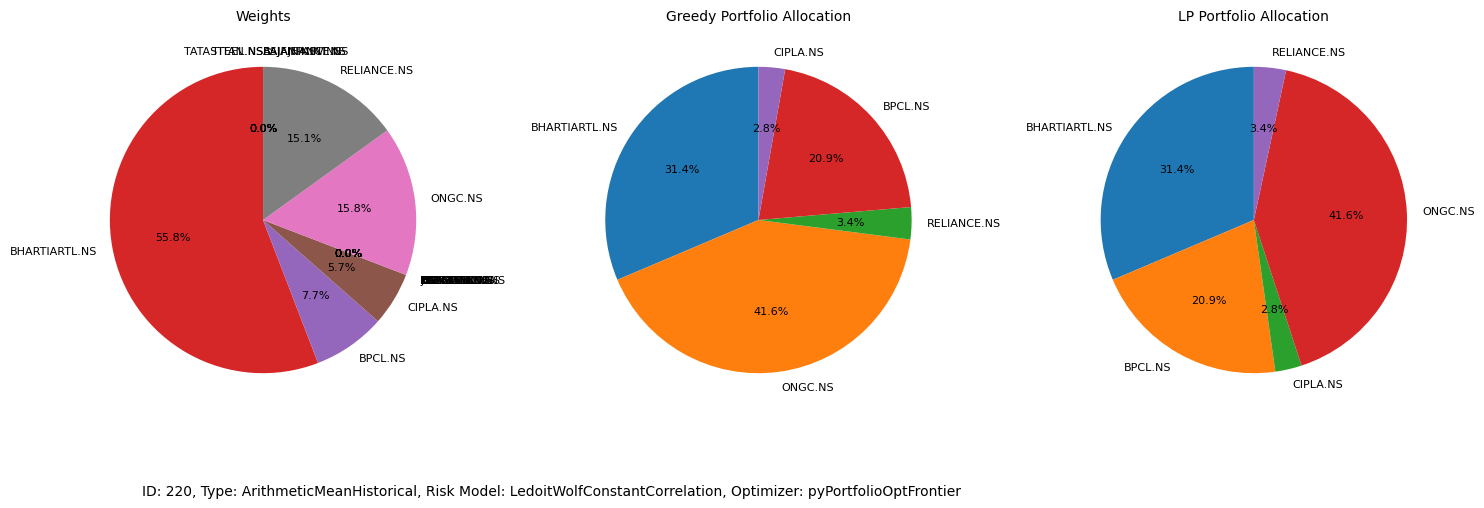

Row 1195:


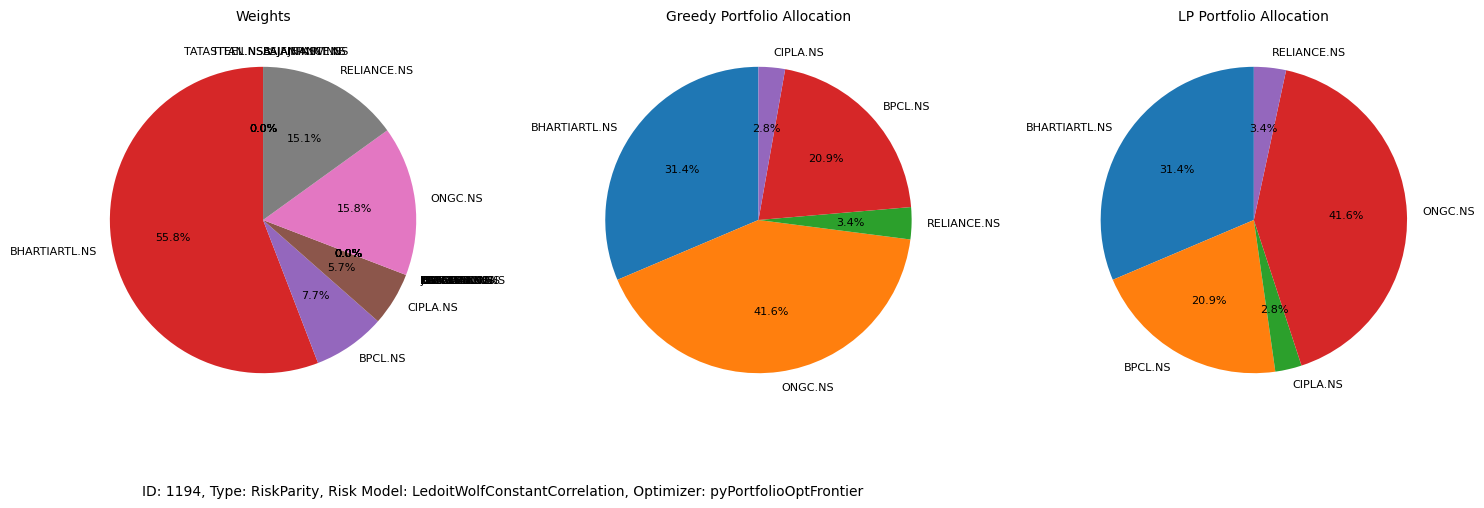

Row 712:


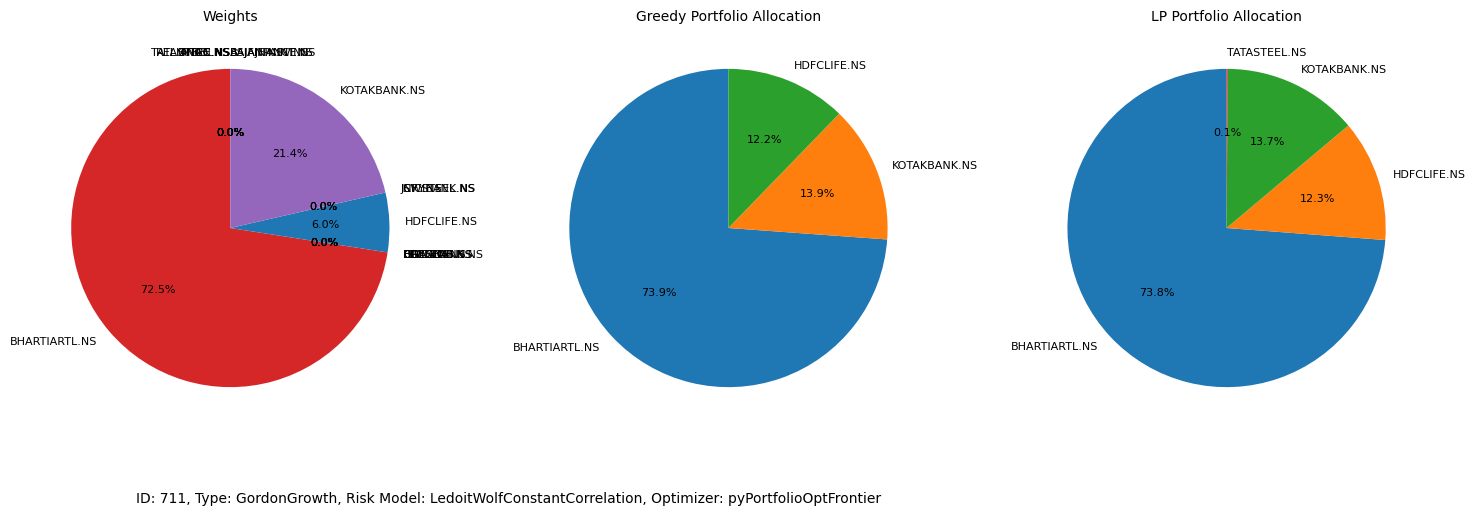

Row 701:


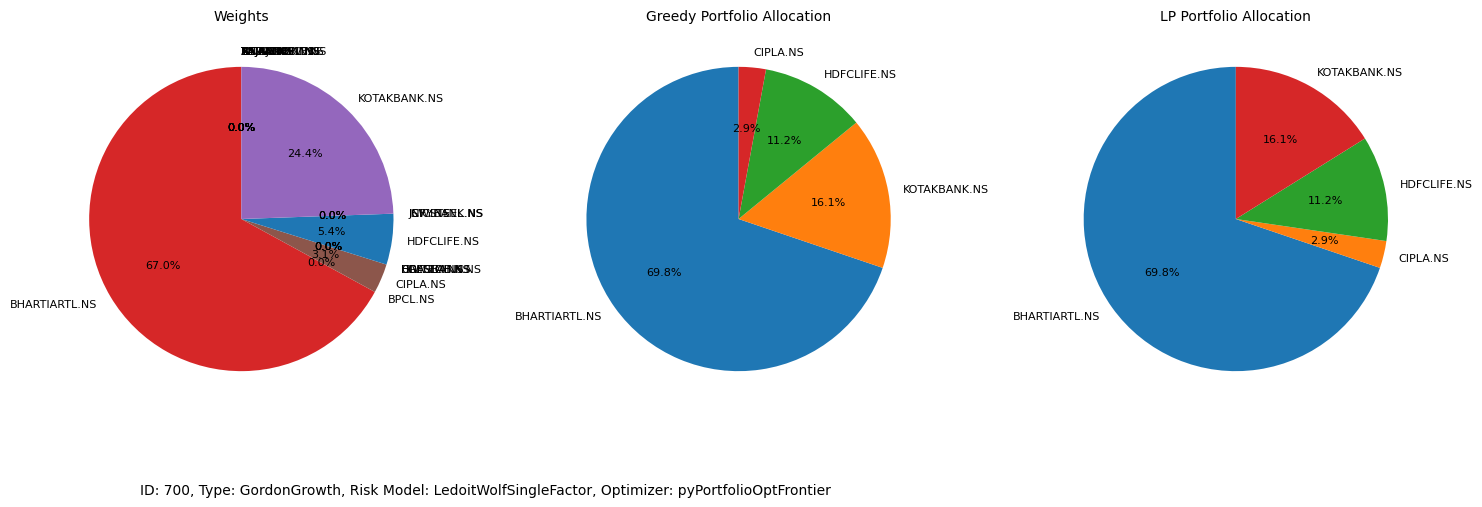

Row 679:


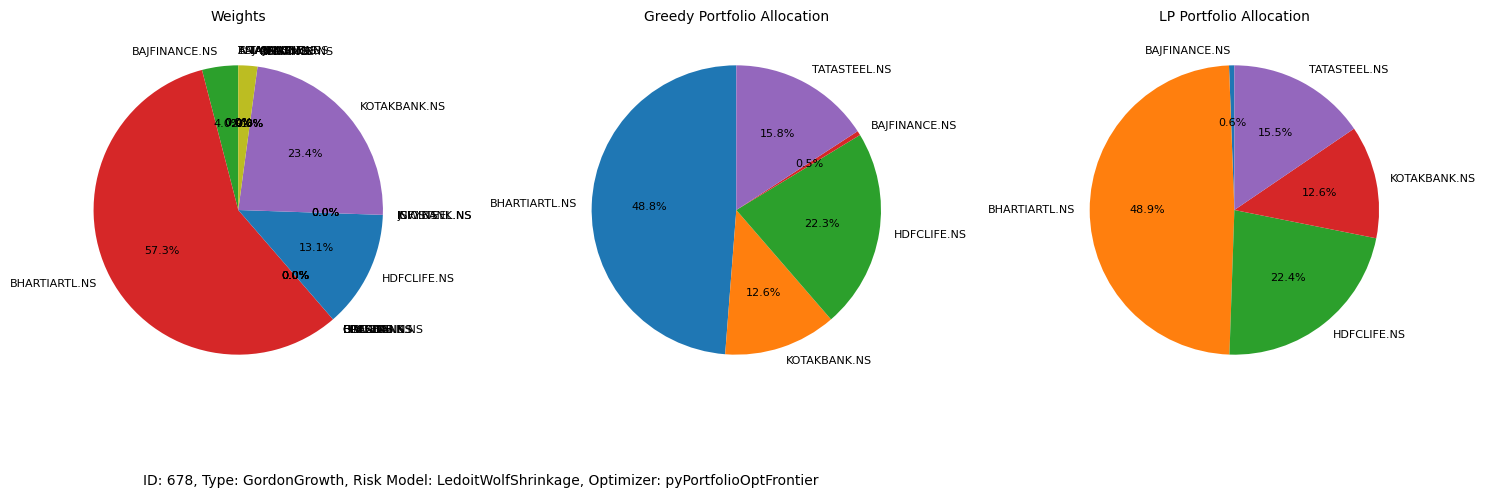

Row 690:


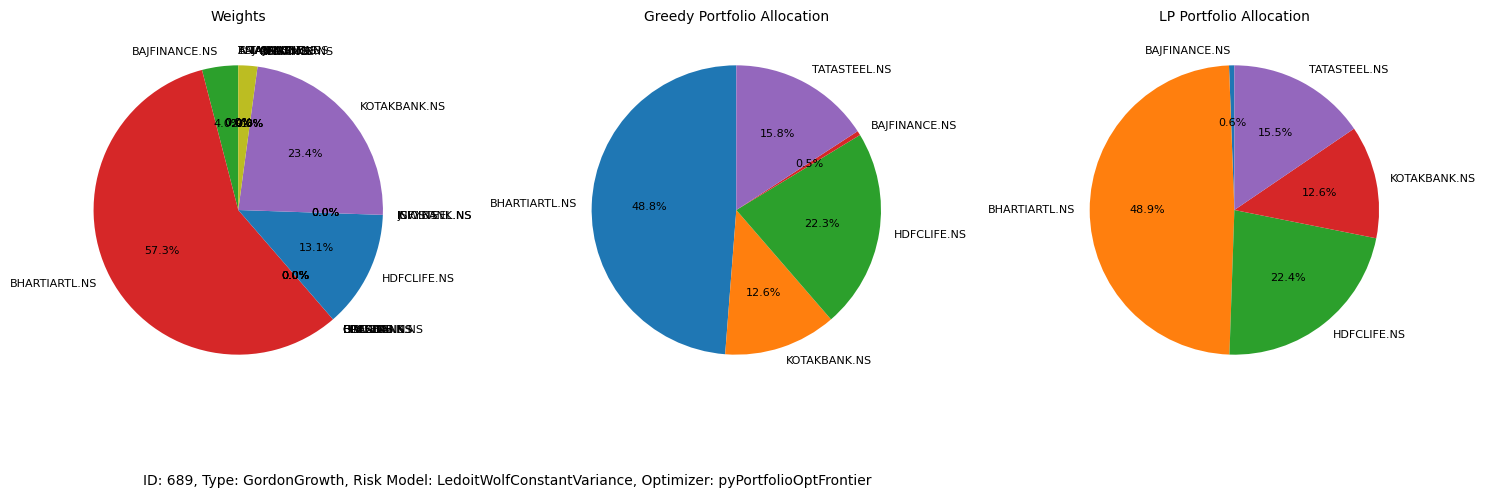

Row 723:


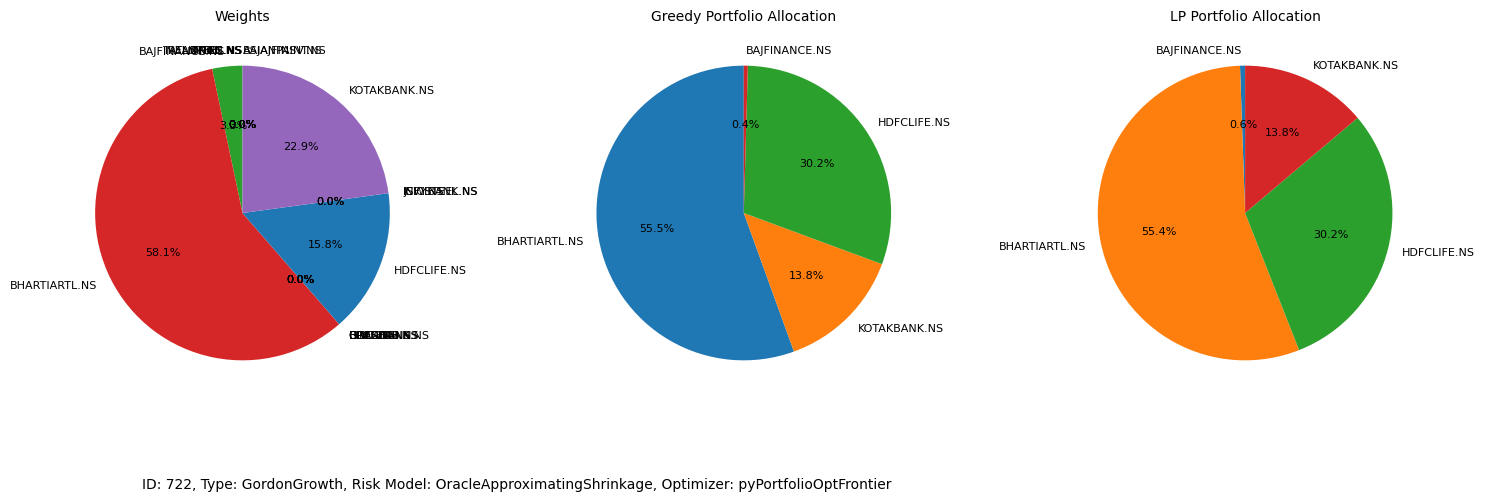

Row 647:


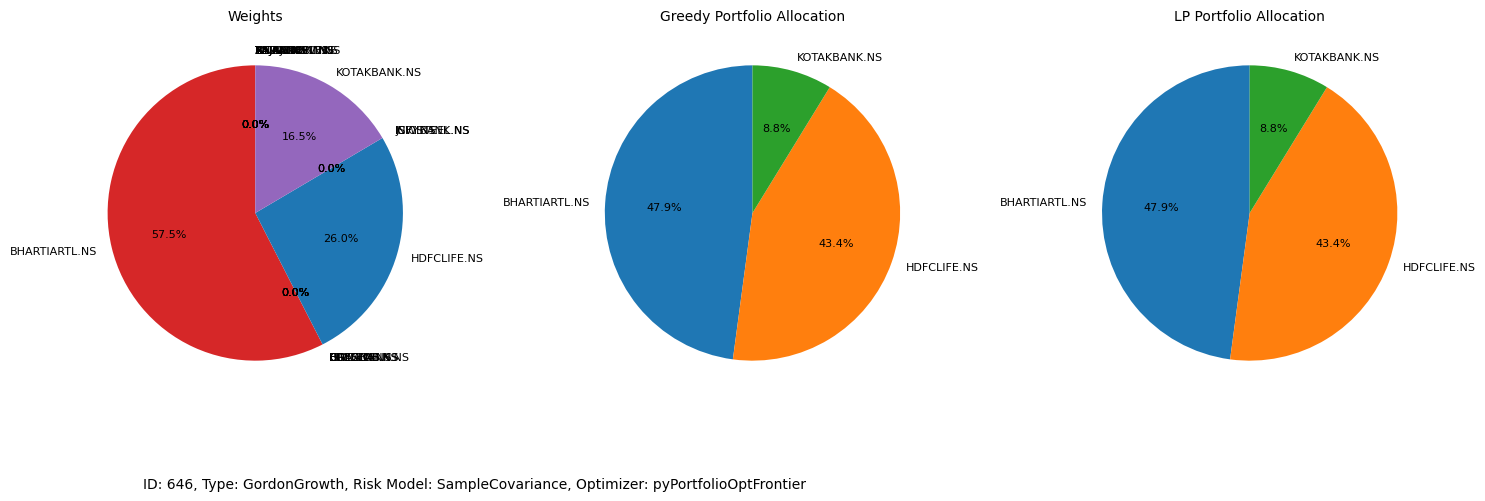

Row 668:


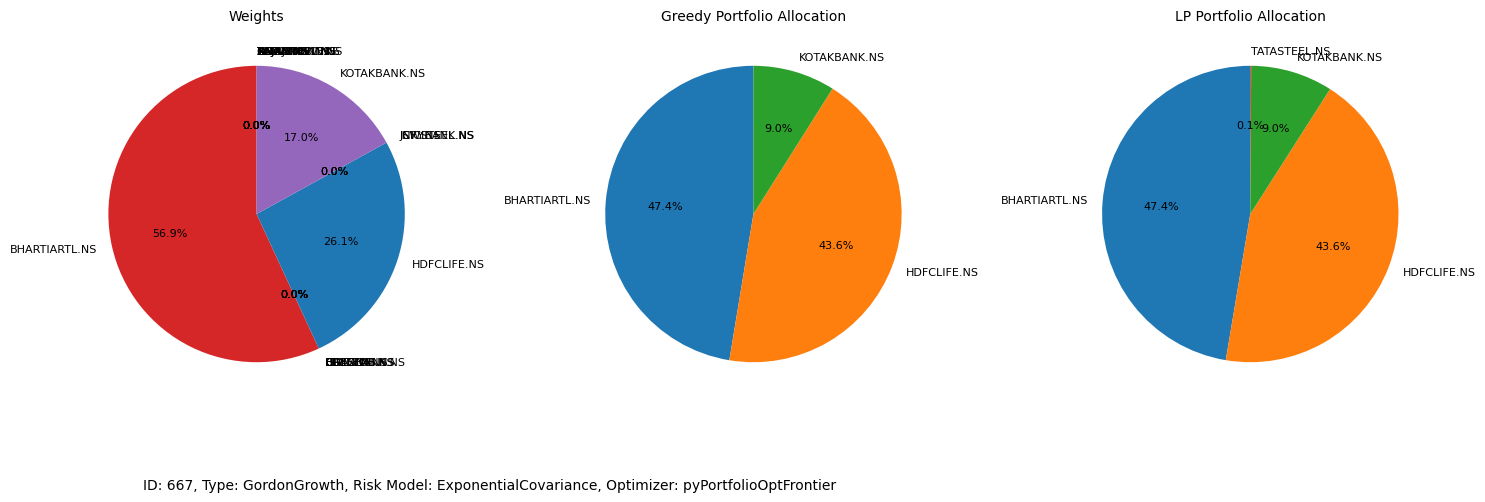

Row 874:


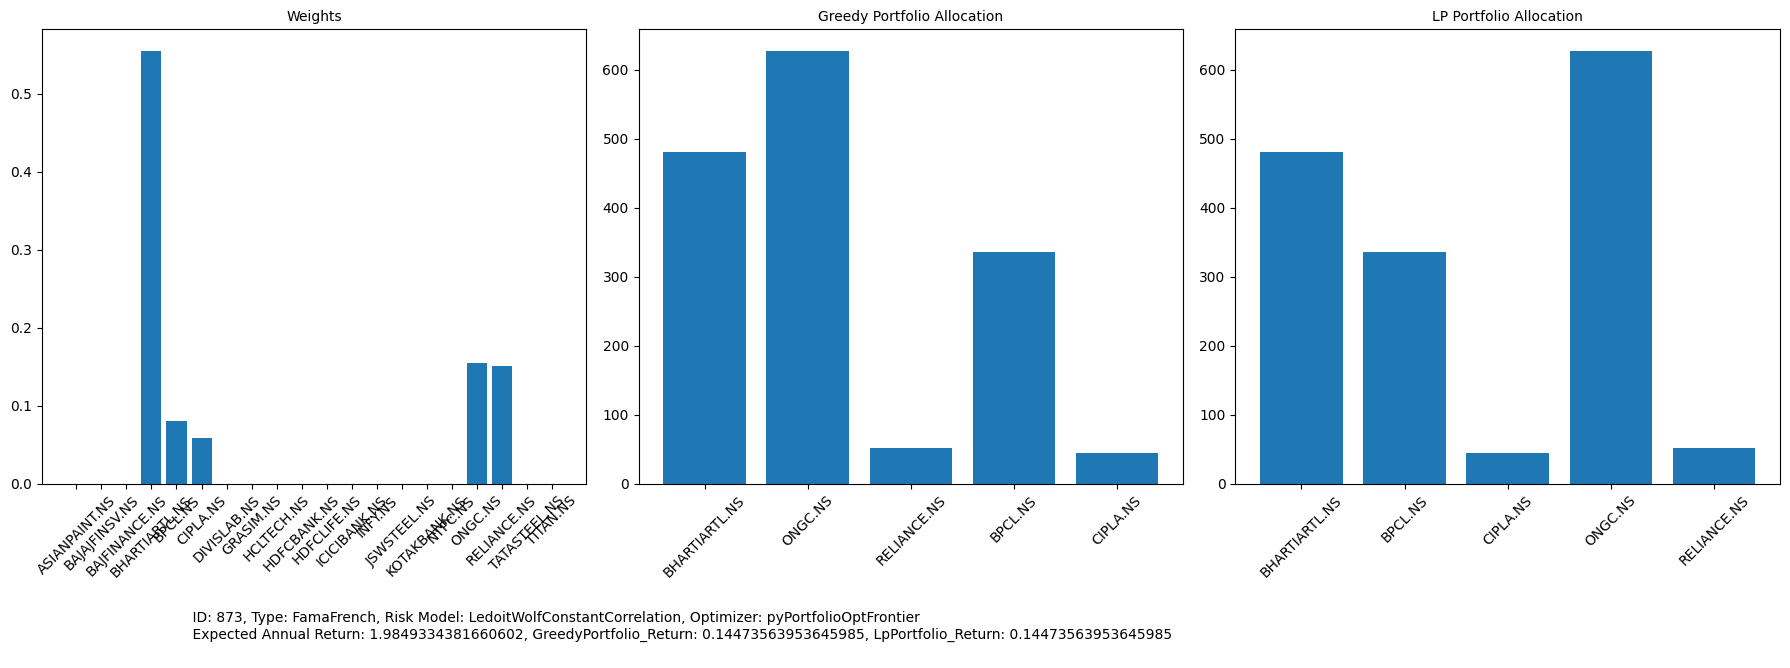

Row 221:


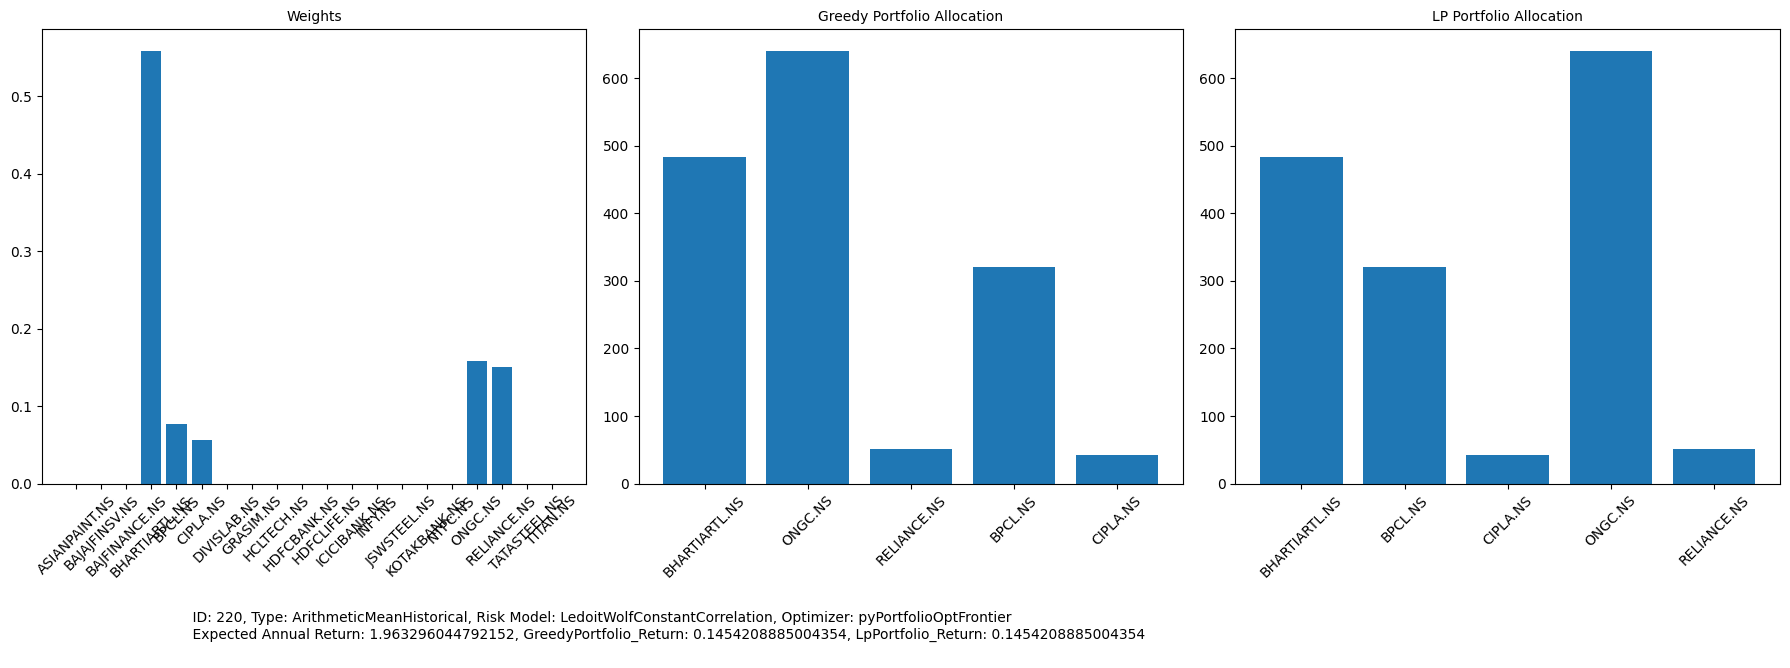

Row 1195:


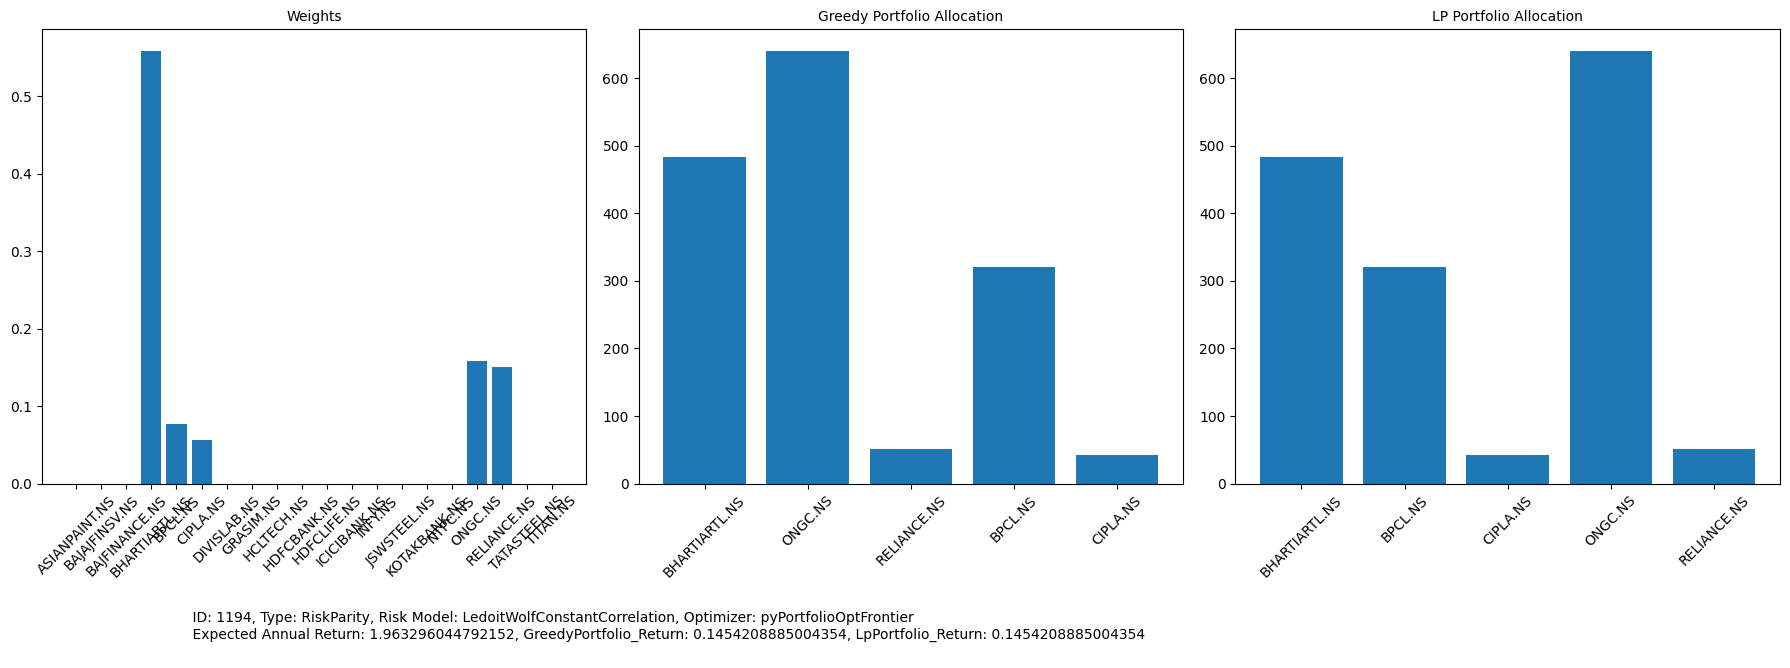

Row 712:


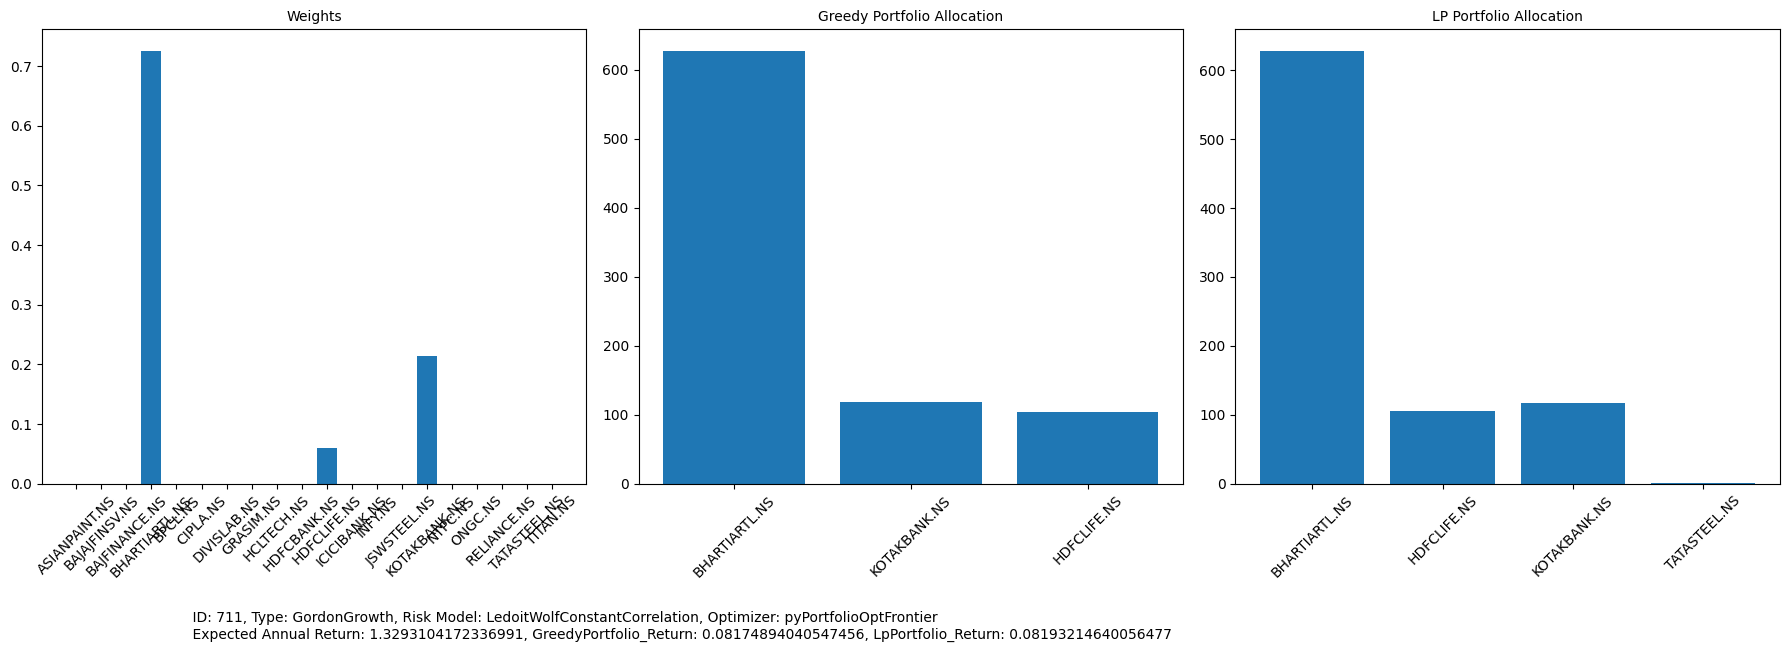

Row 701:


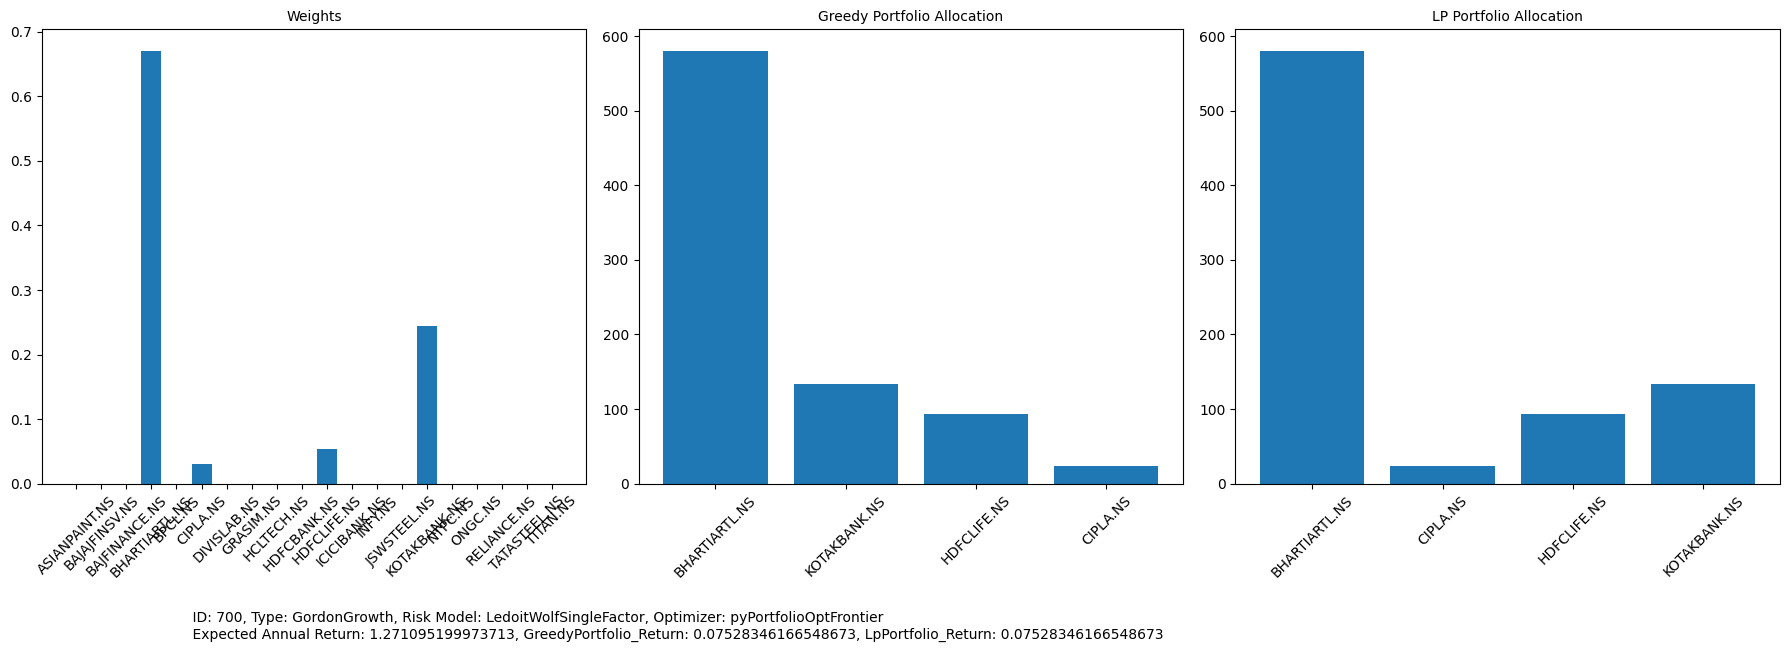

Row 679:


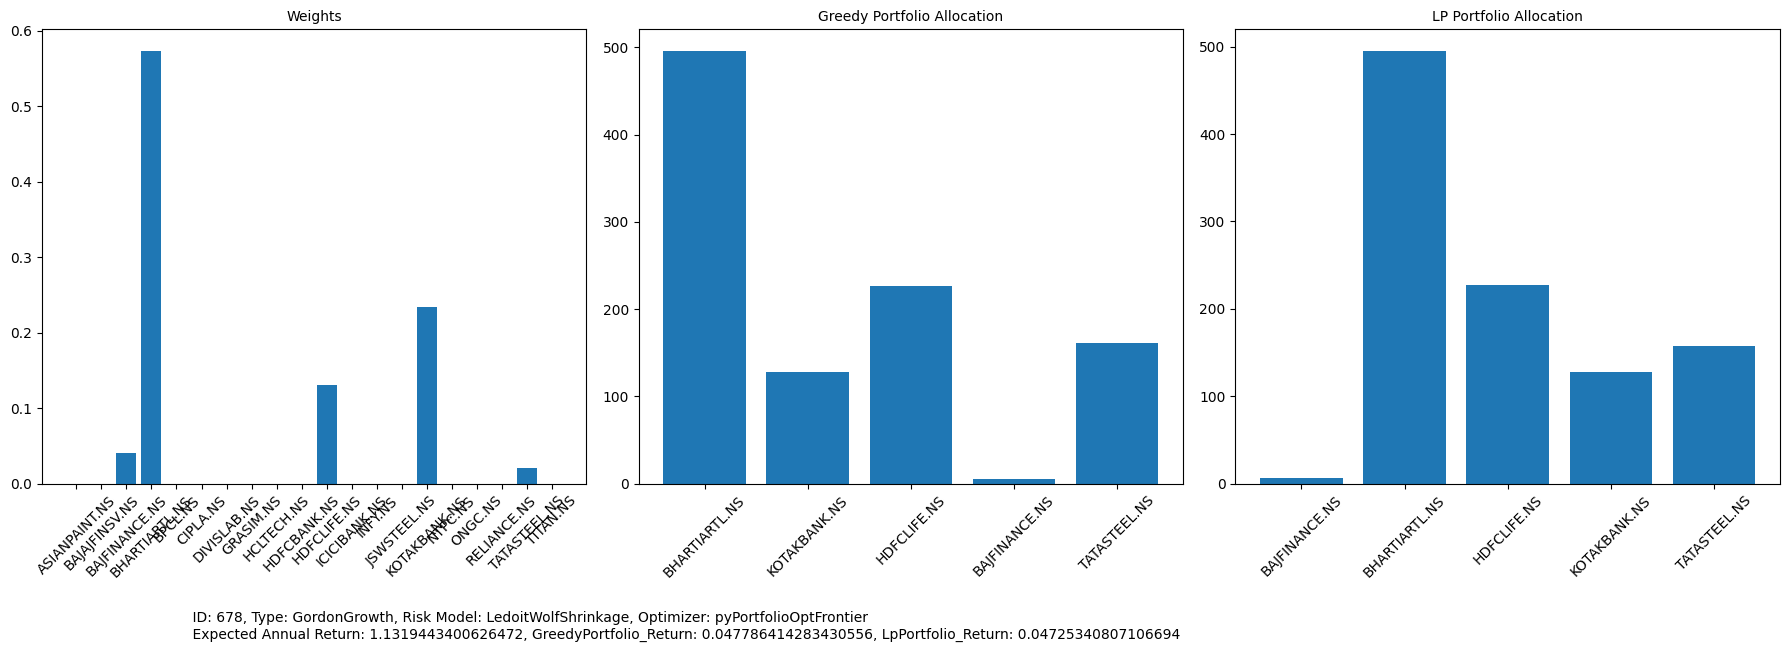

Row 690:


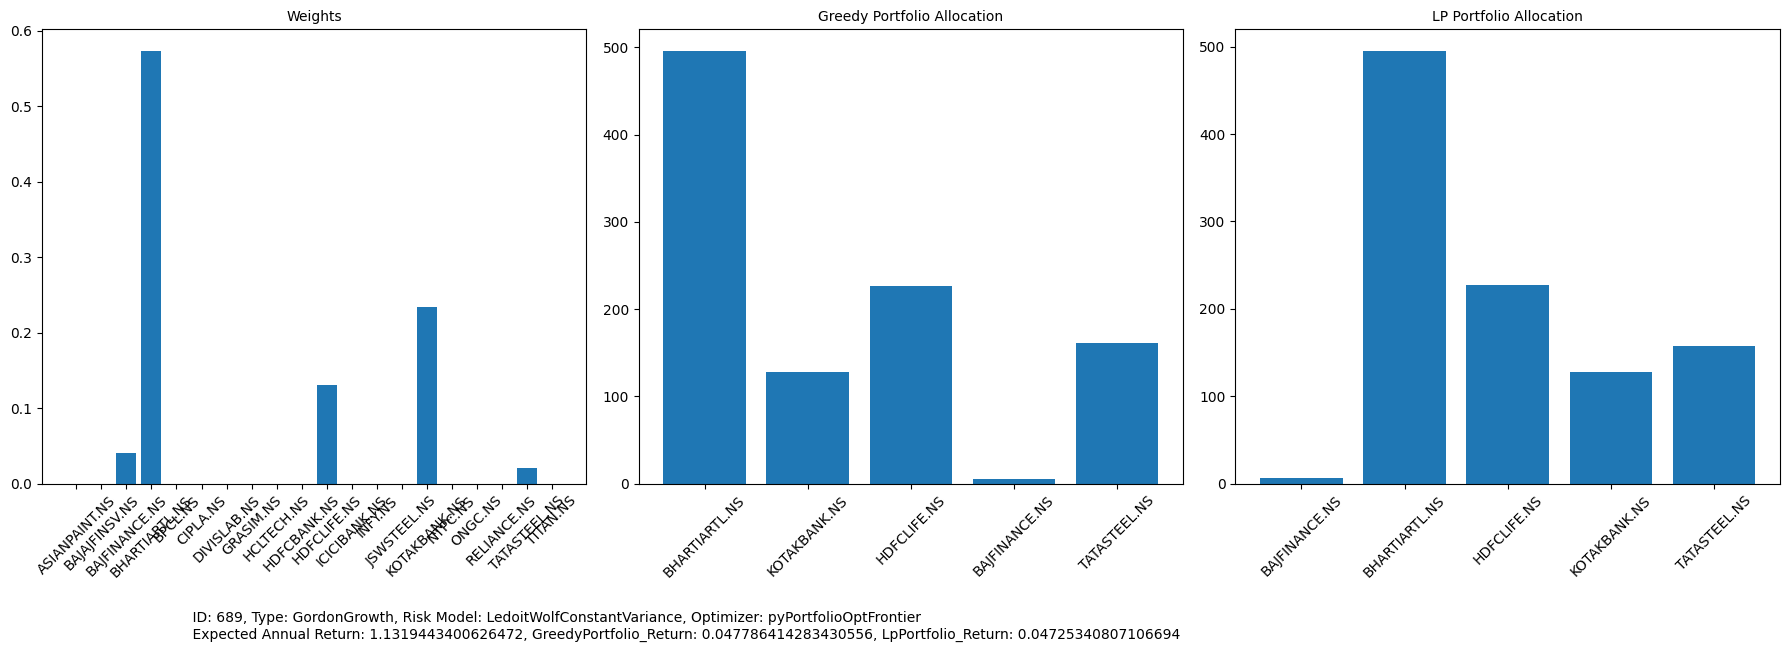

Row 723:


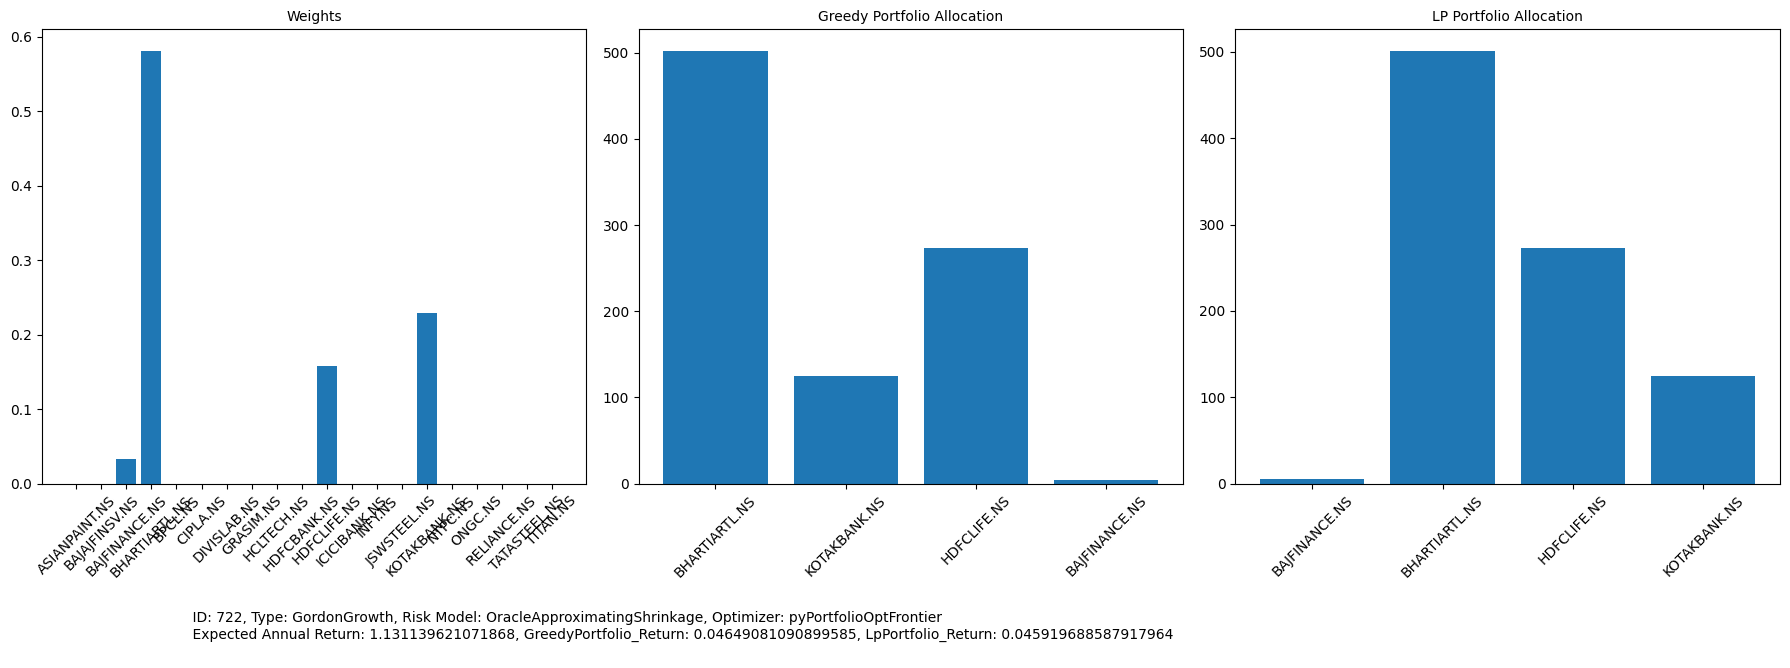

Row 647:


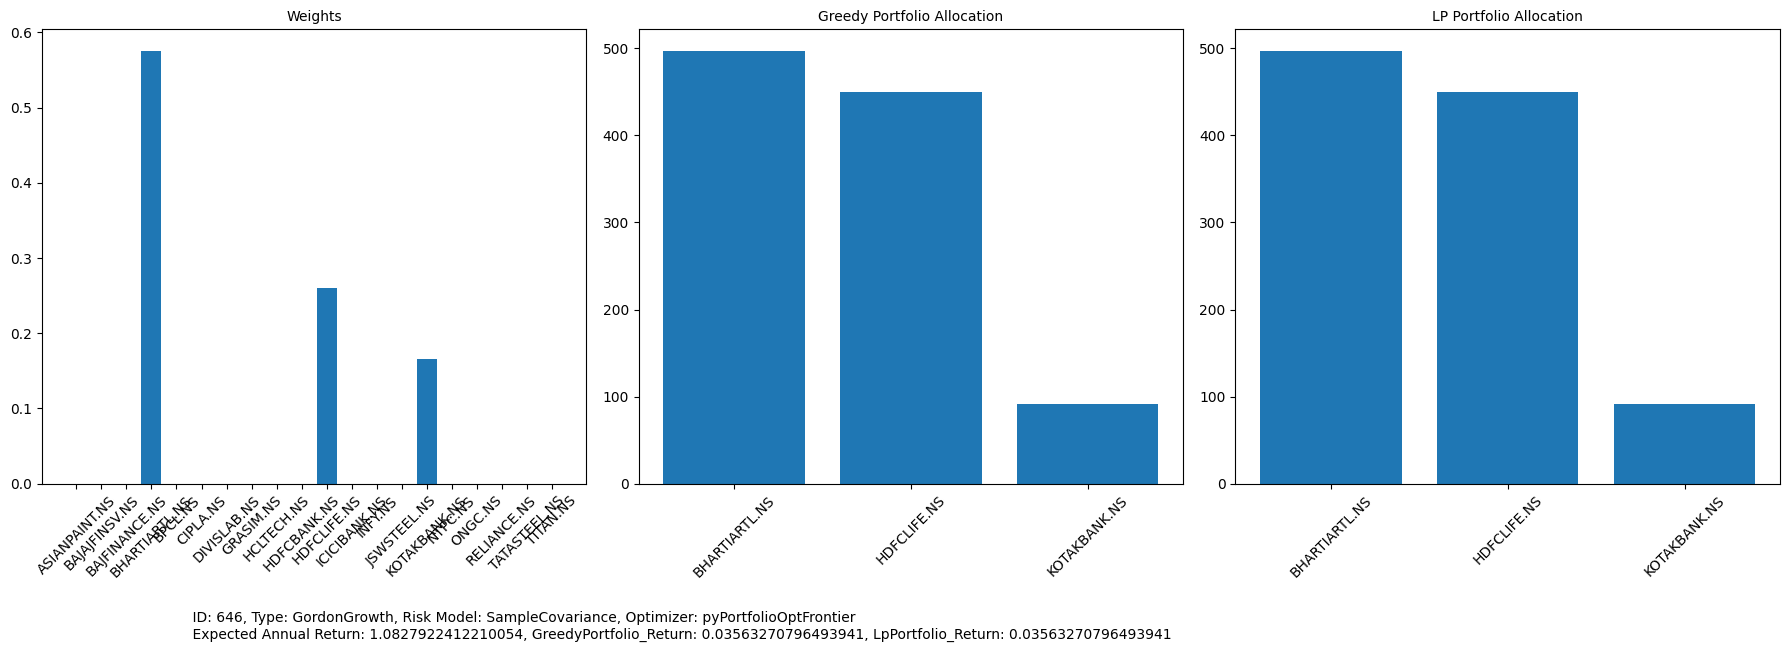

Row 668:


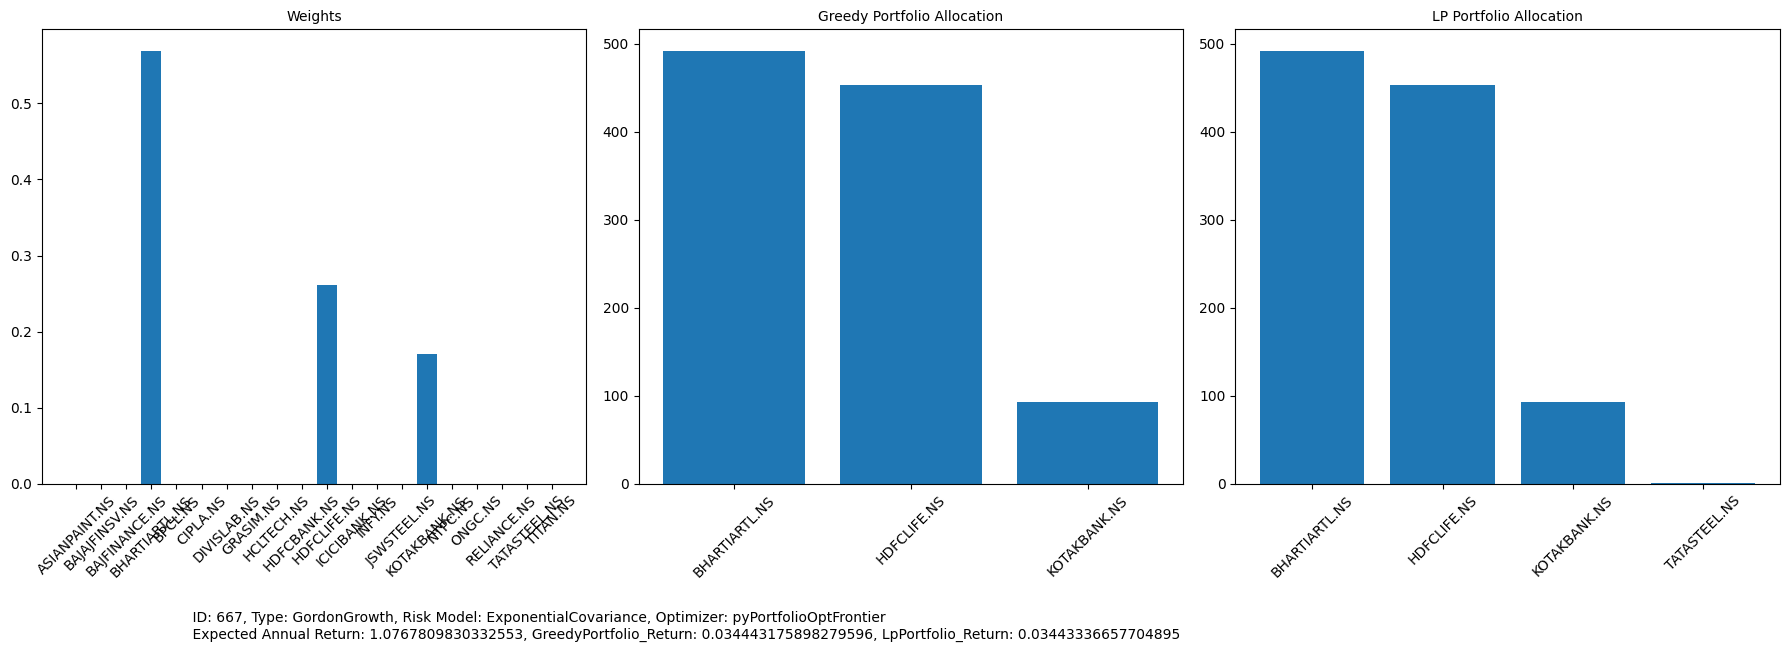

In [201]:
plot(best_return)
plot_bar(best_return)

Row 1:


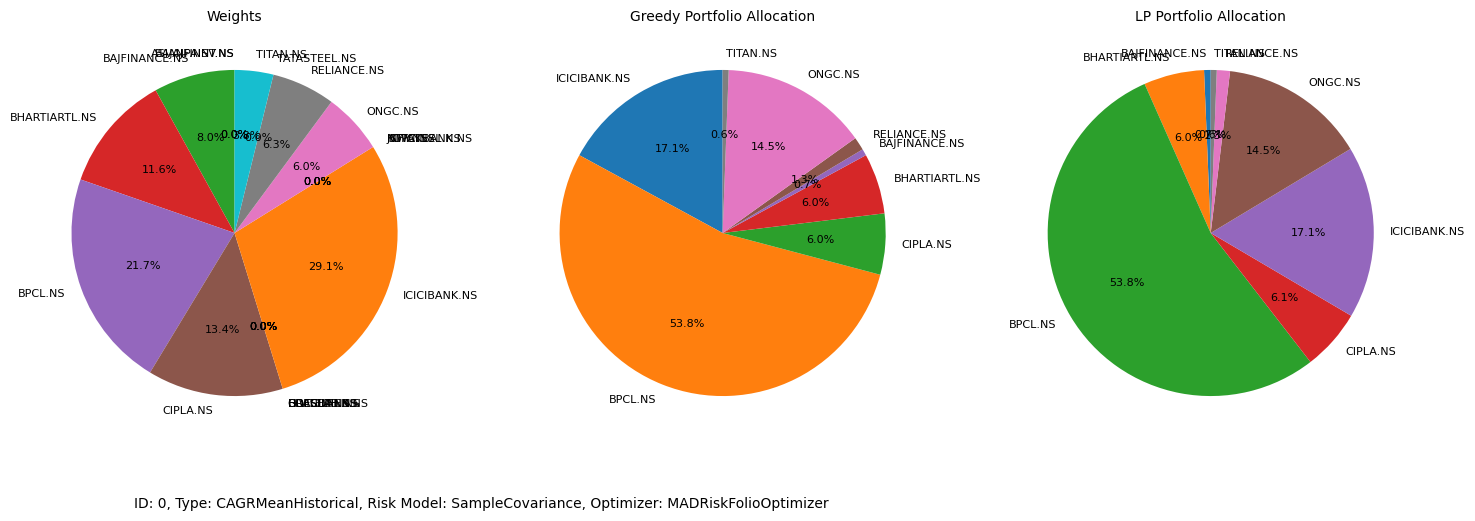

Row 11:


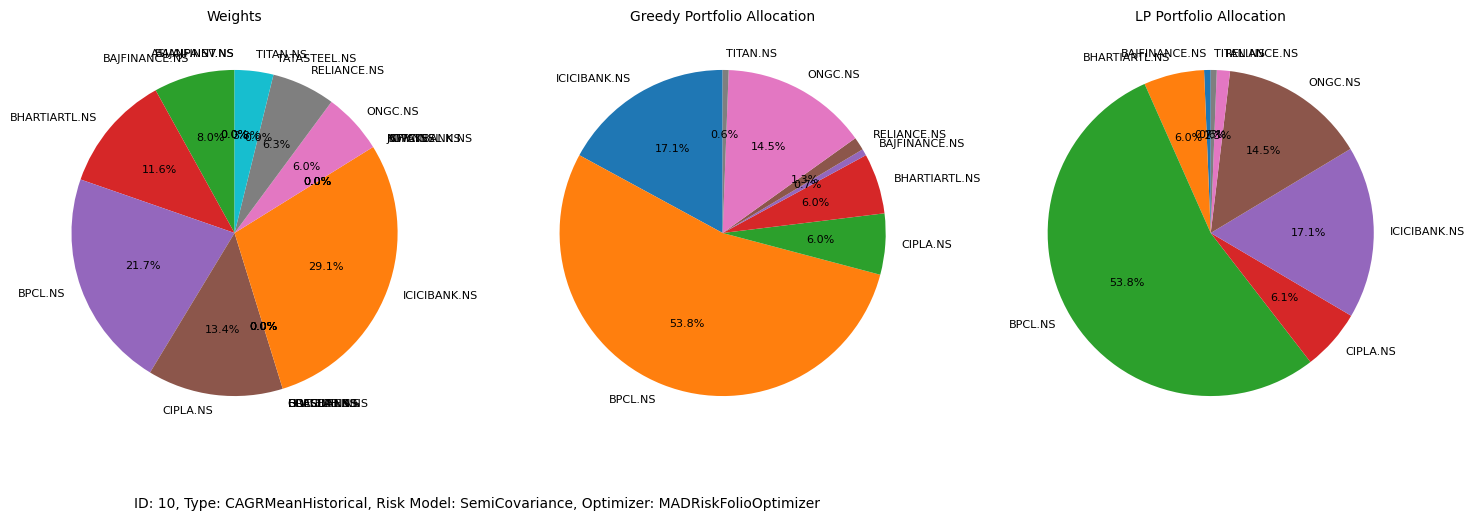

Row 21:


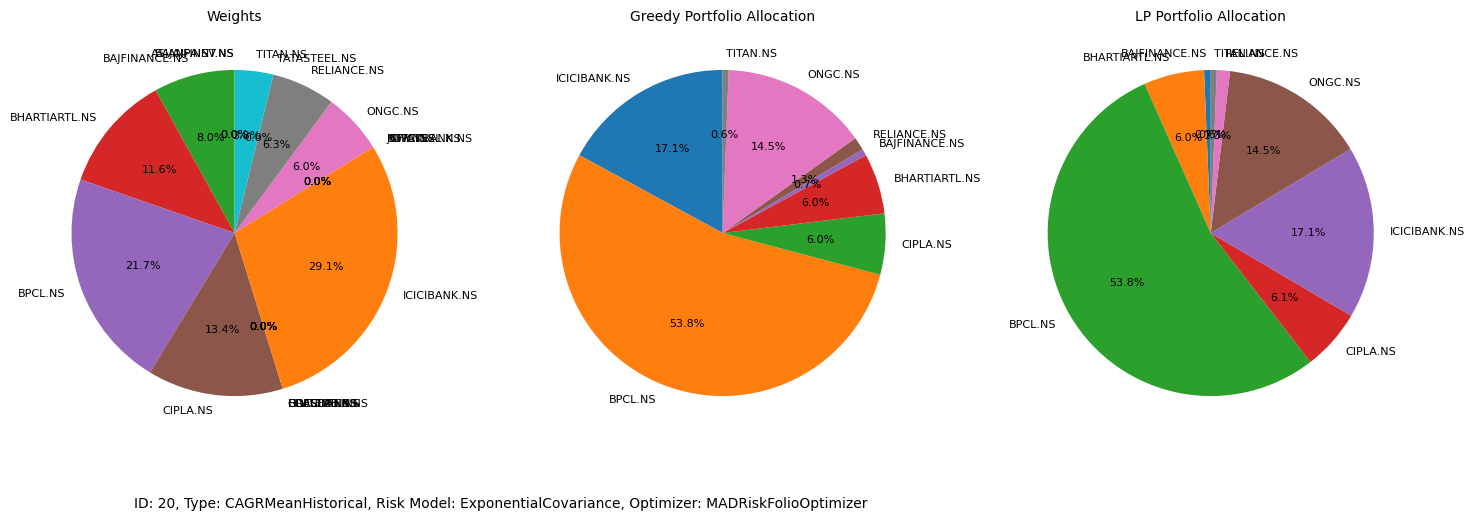

Row 31:


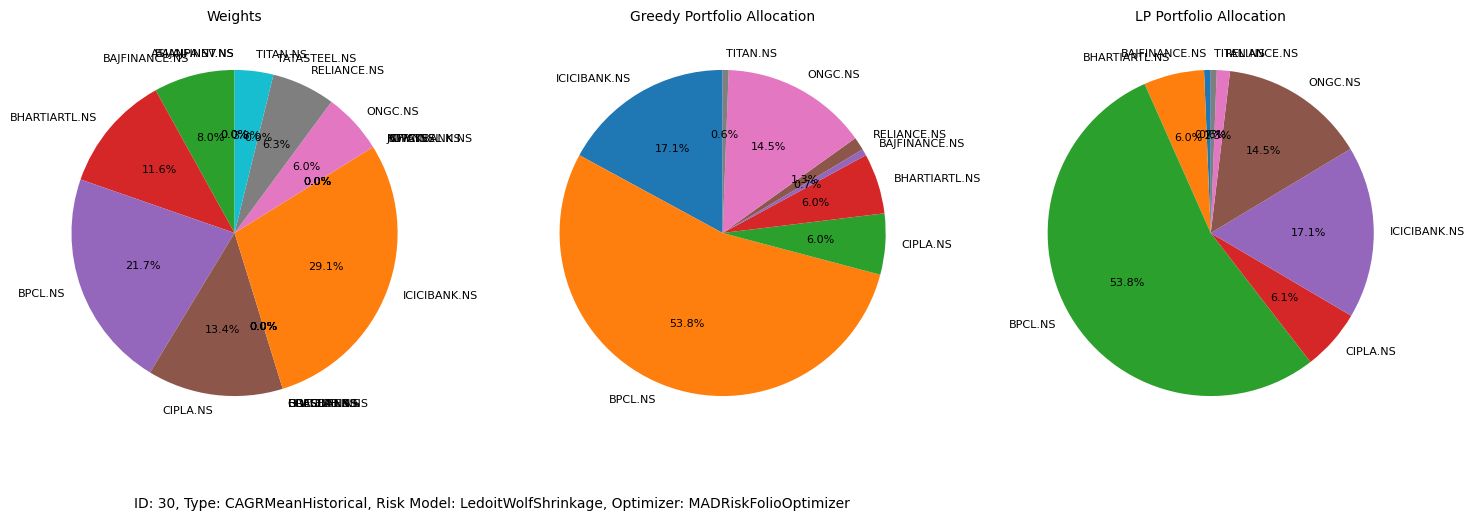

Row 41:


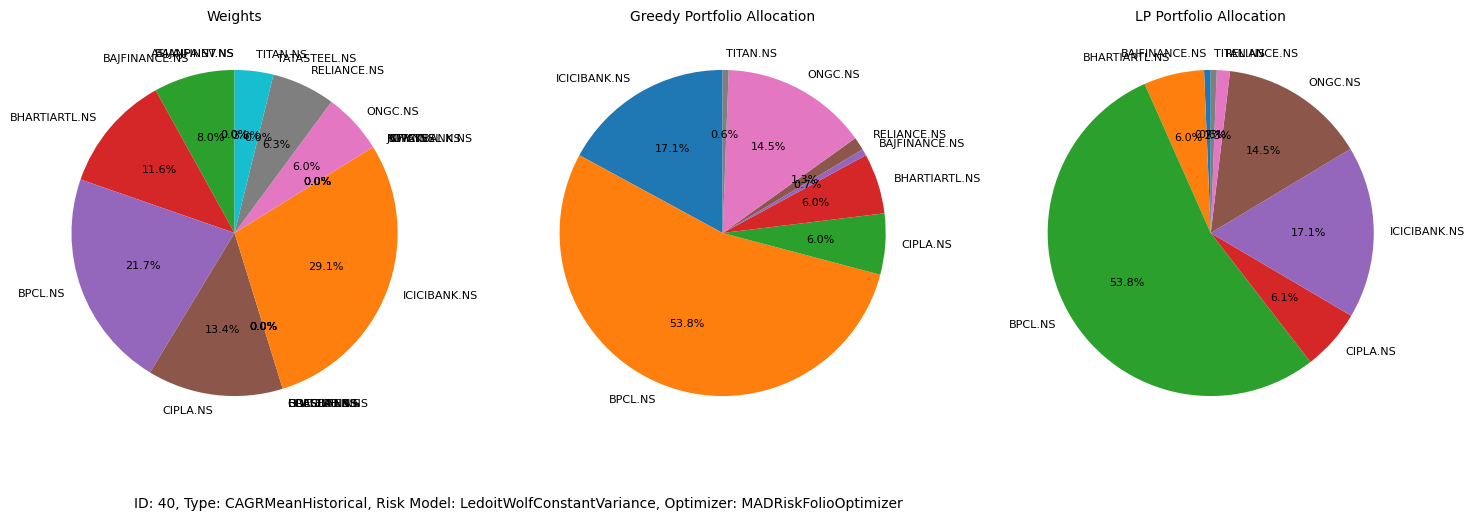

Row 51:


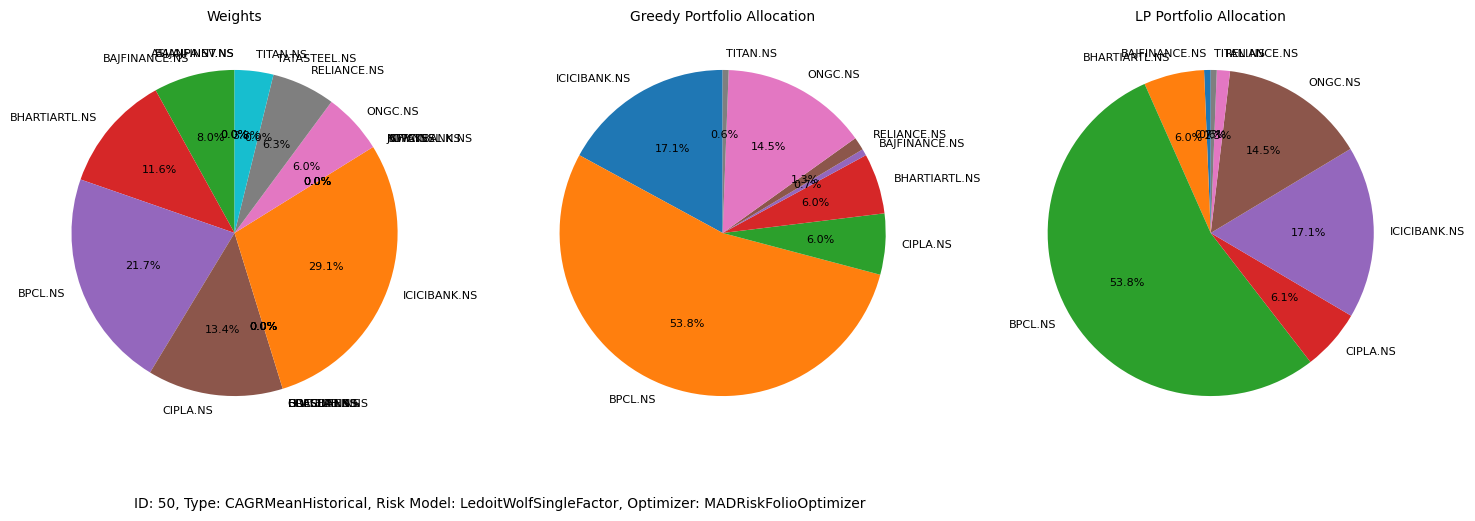

Row 61:


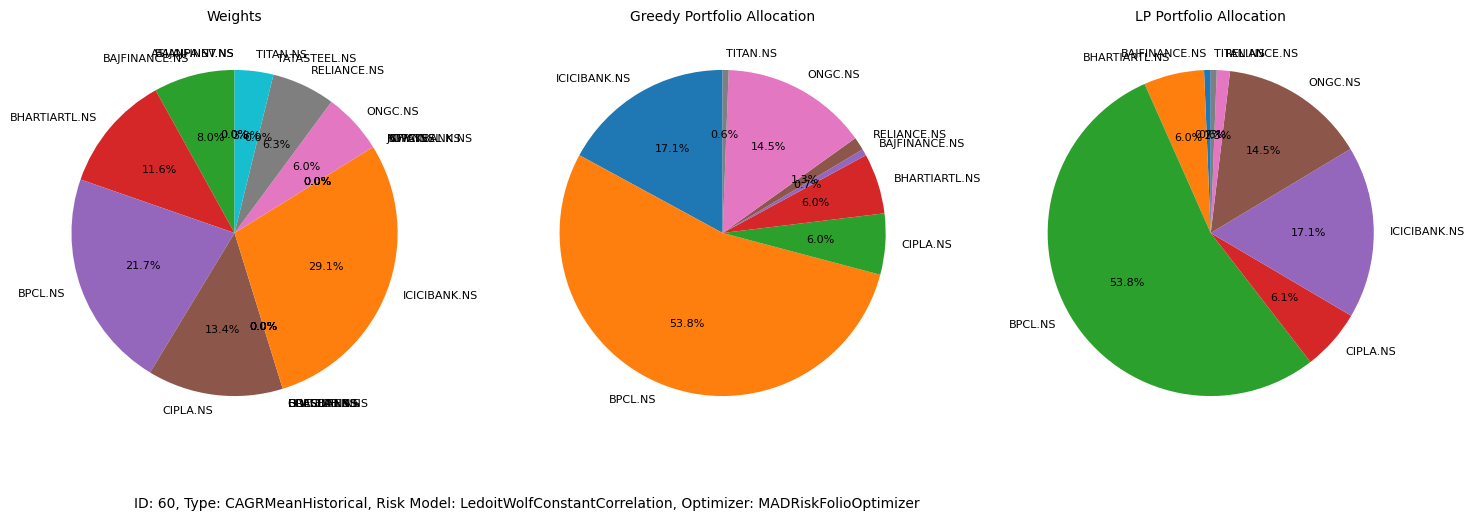

Row 71:


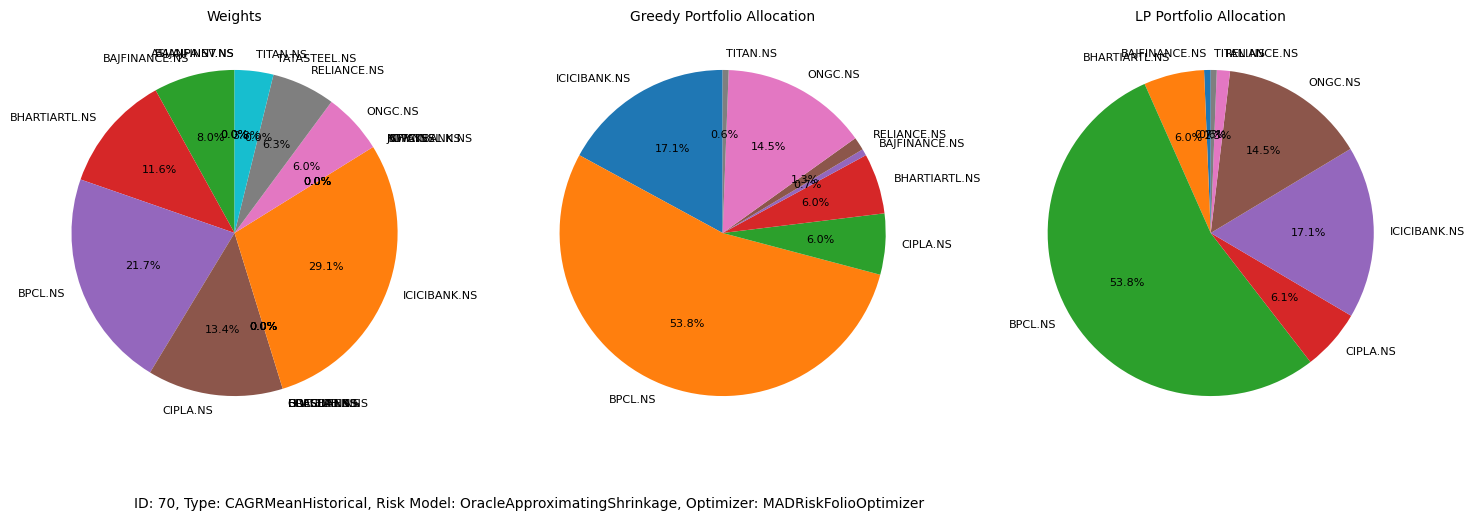

Row 81:


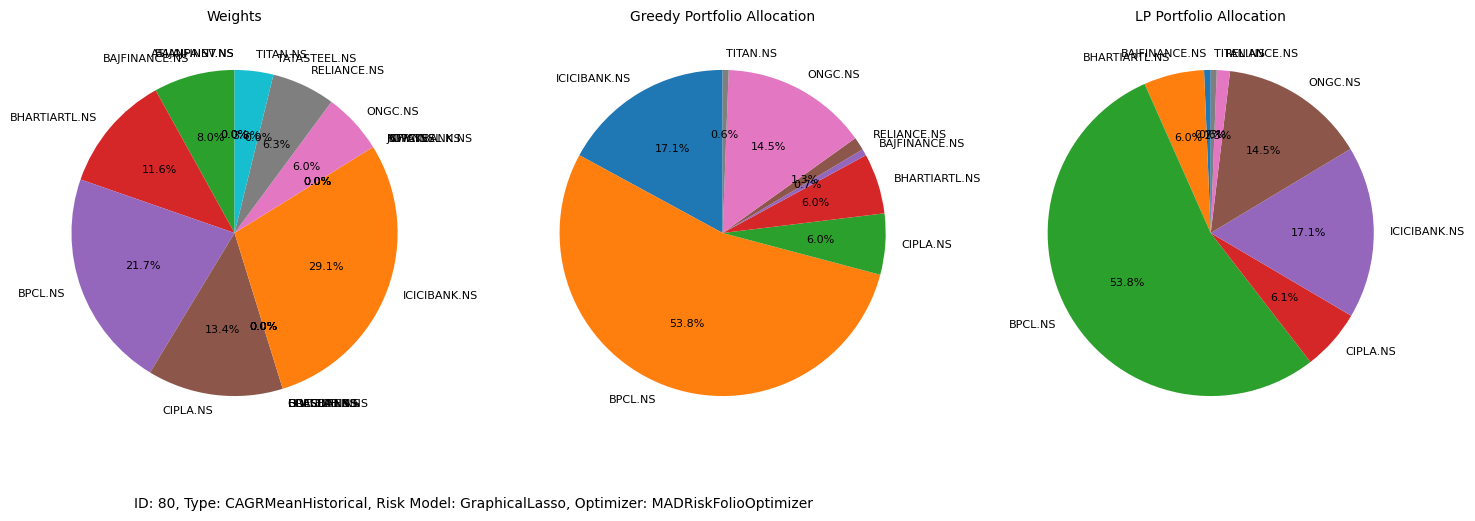

Row 91:


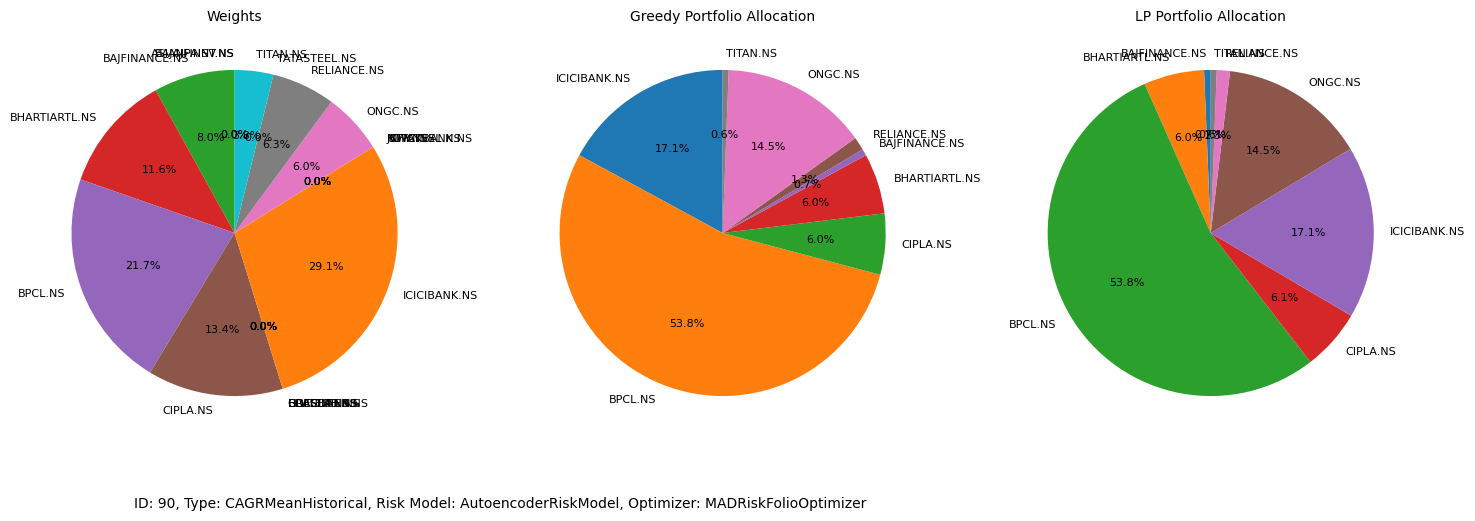

Row 1:


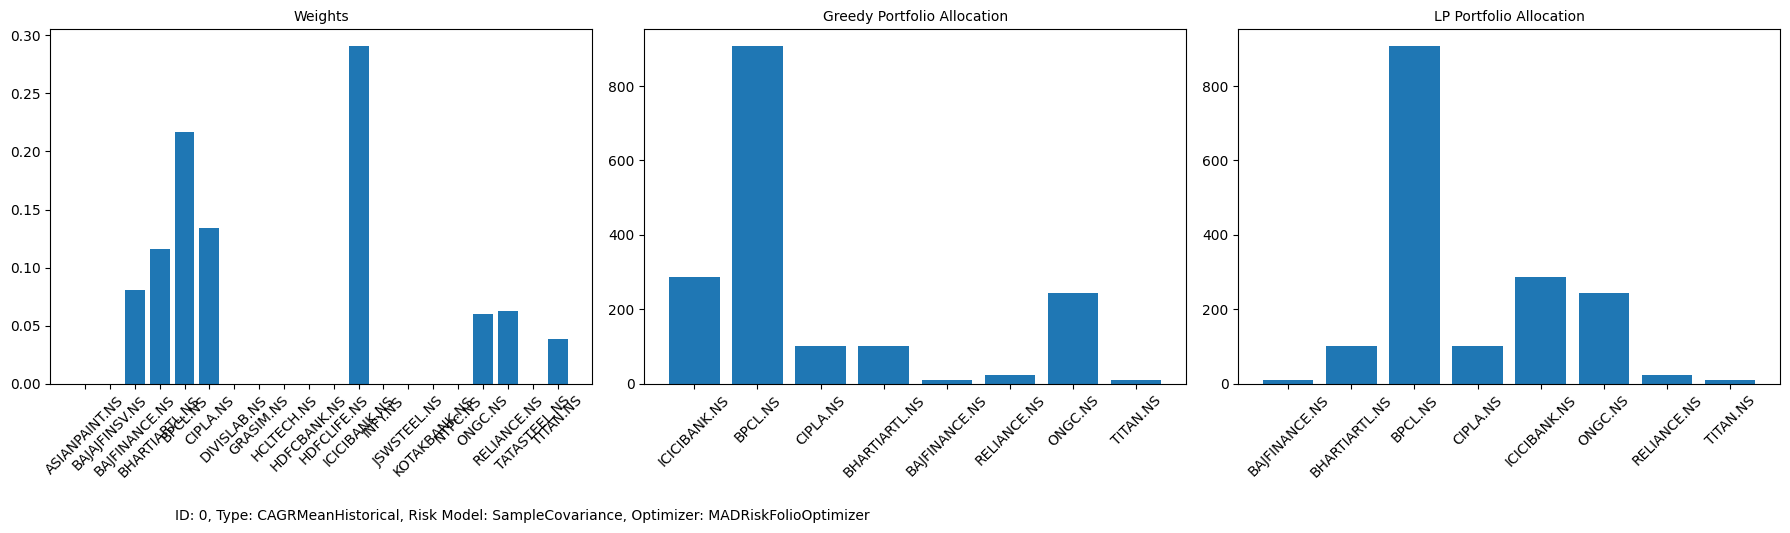

Row 11:


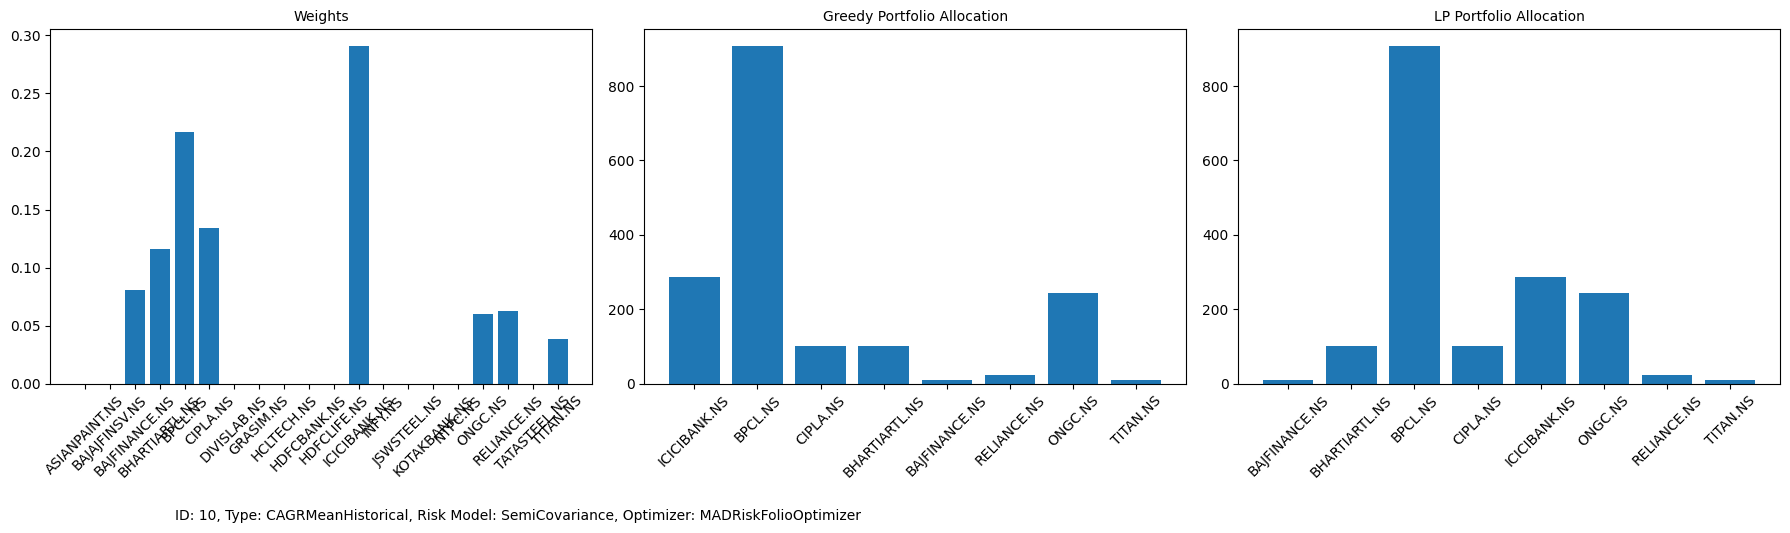

Row 21:


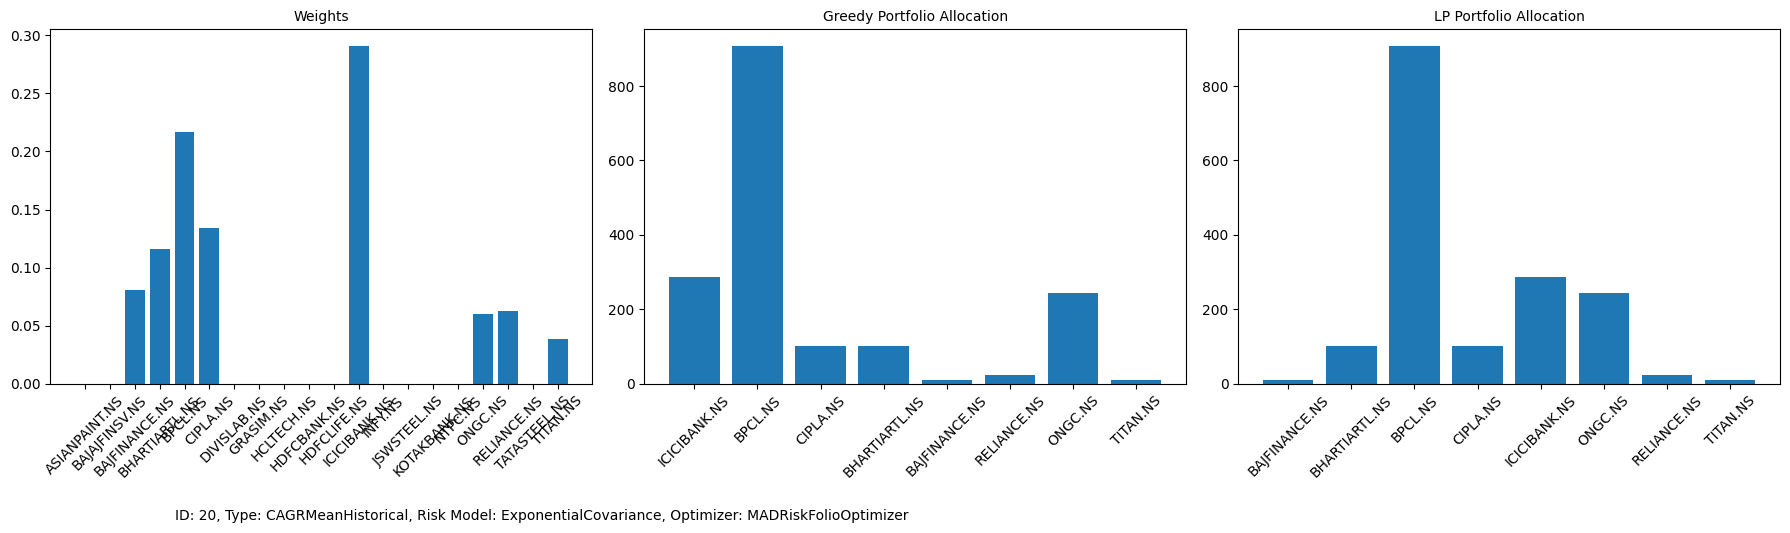

Row 31:


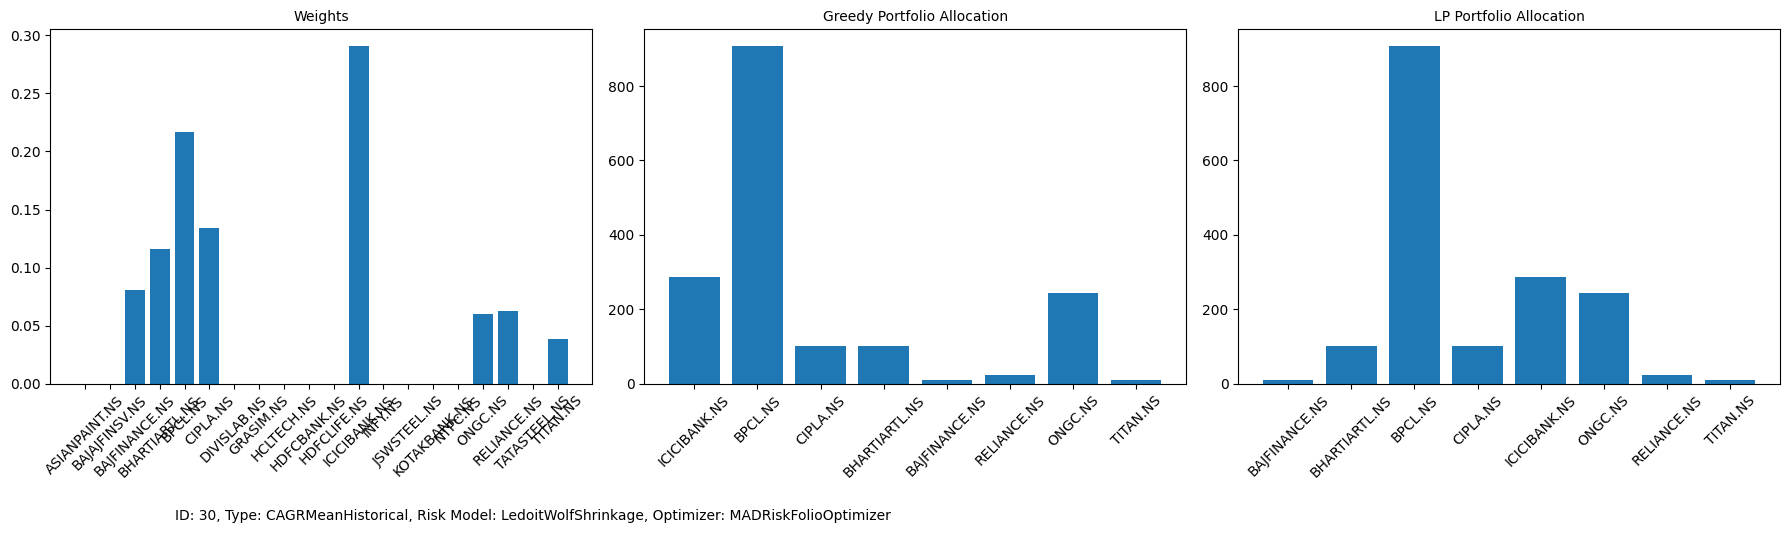

Row 41:


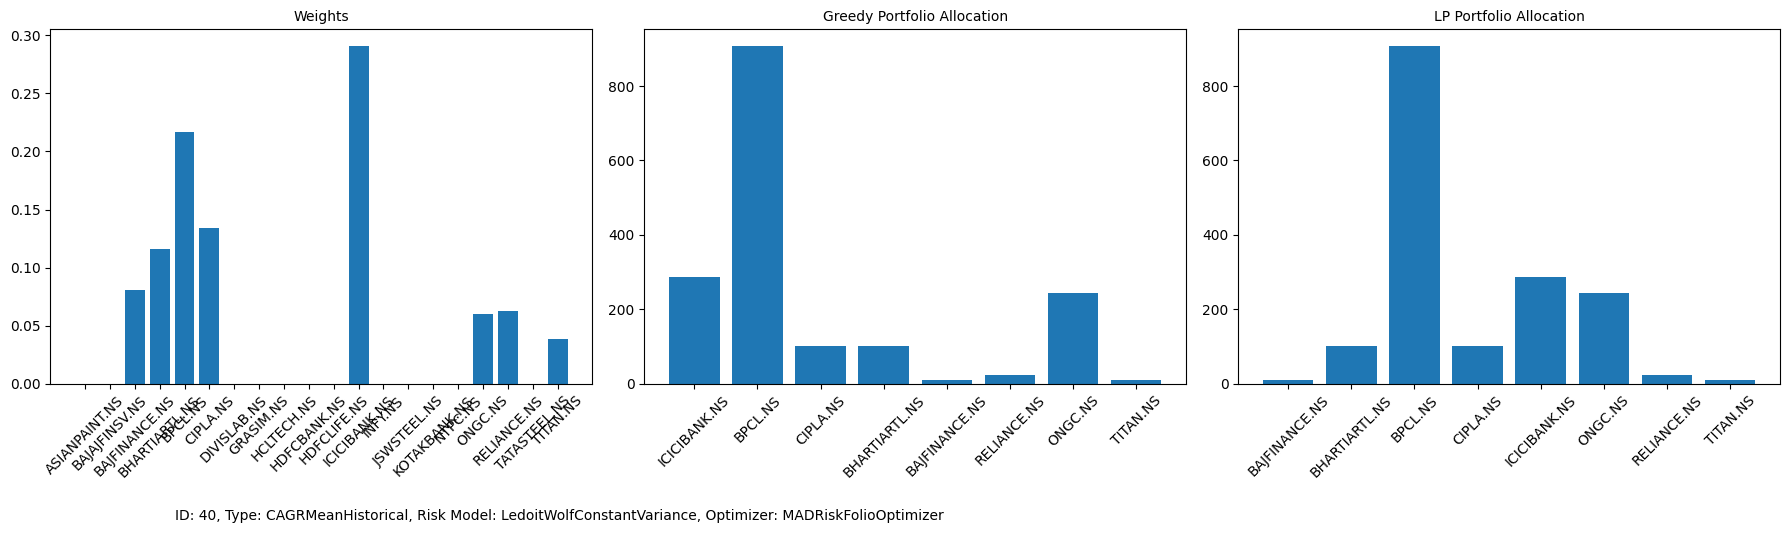

Row 51:


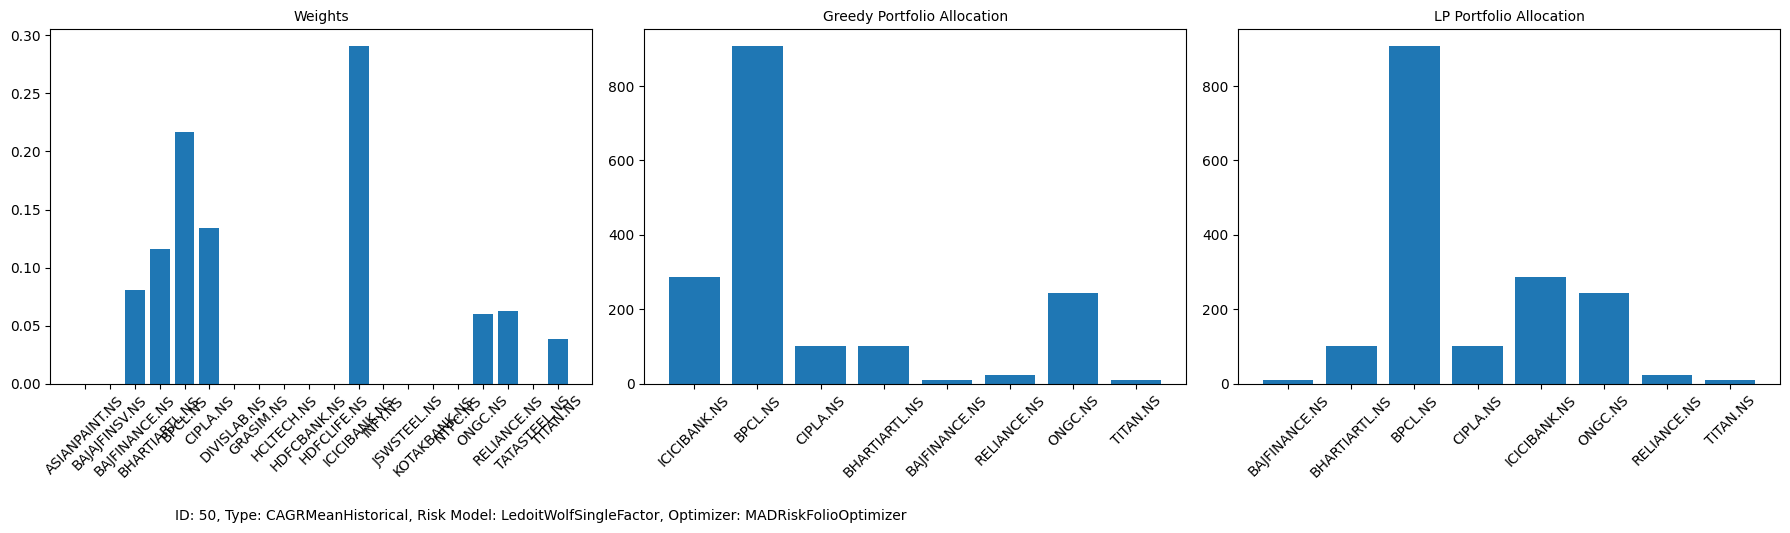

Row 61:


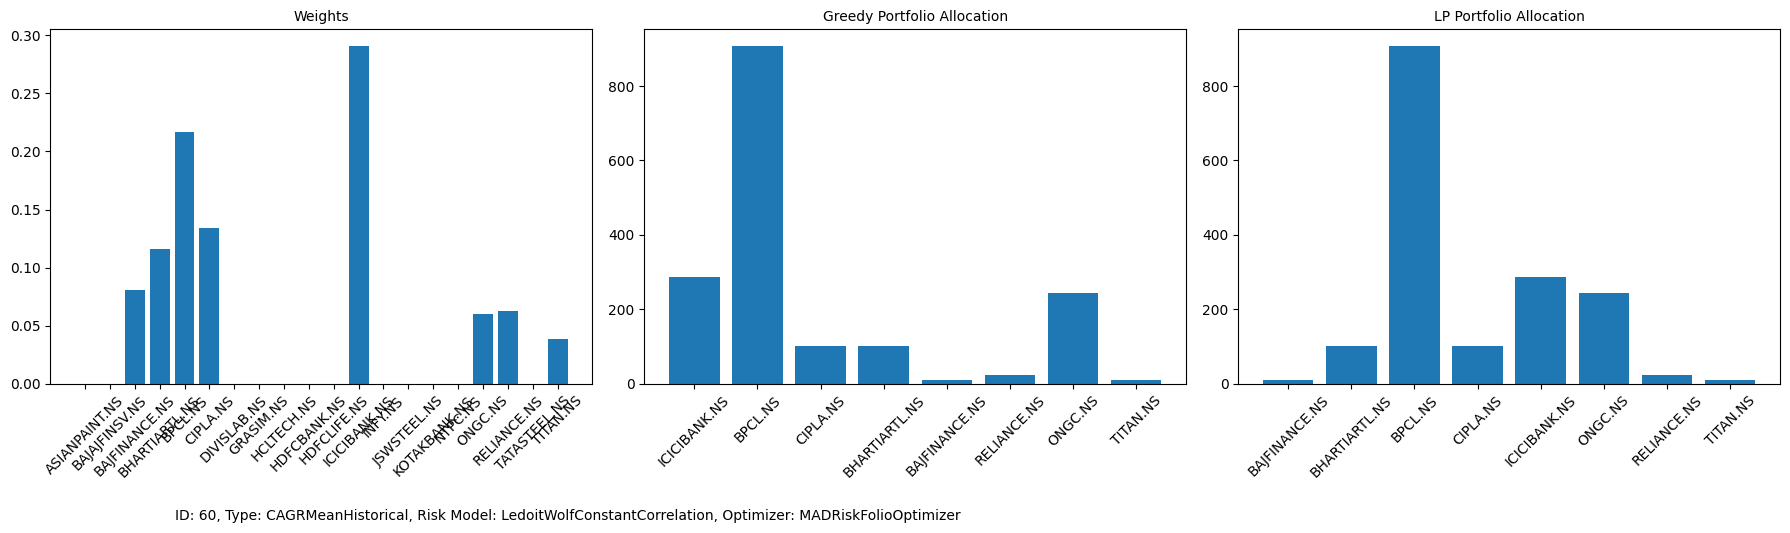

Row 71:


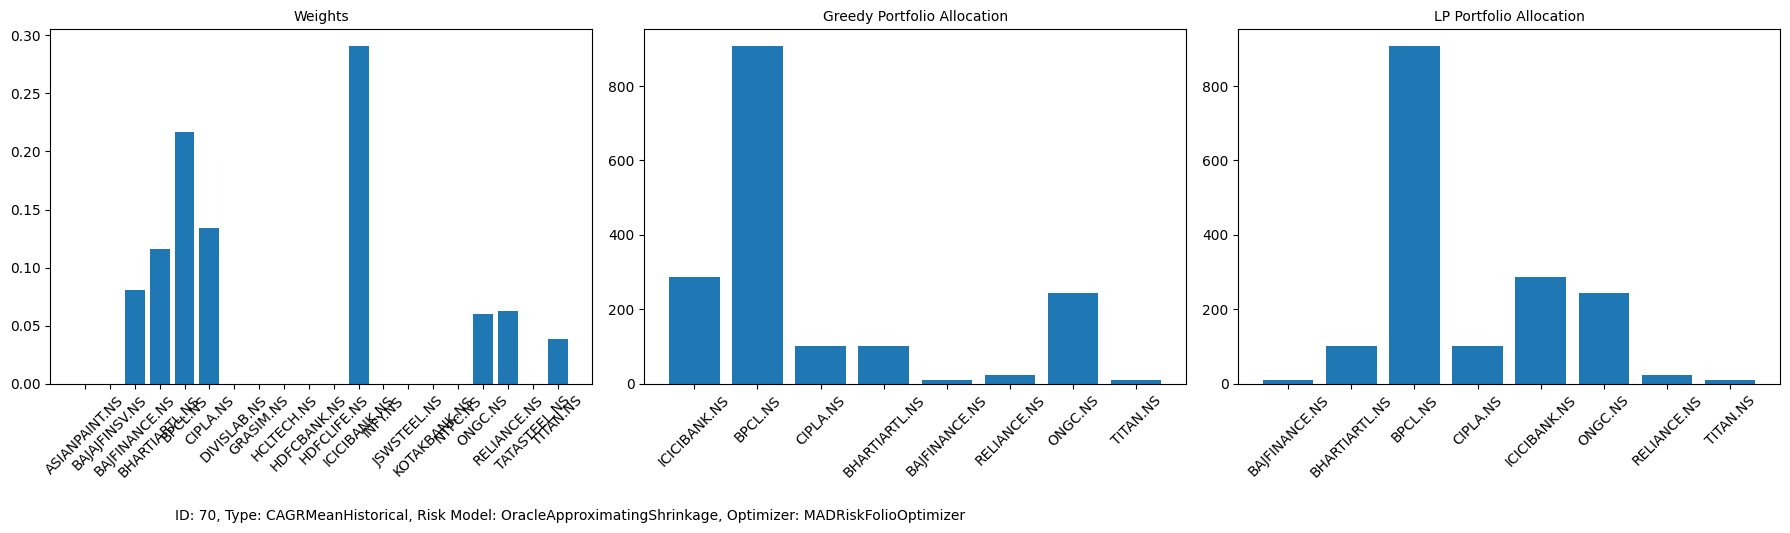

Row 81:


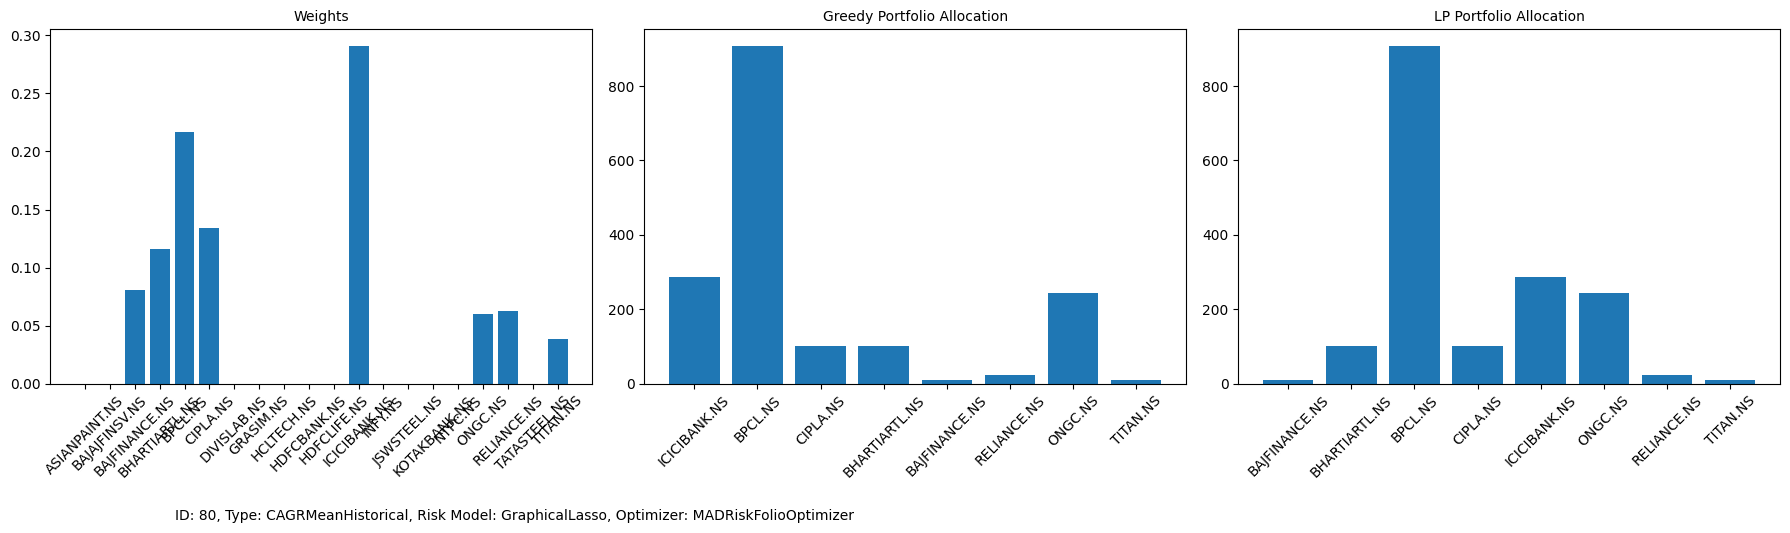

Row 91:


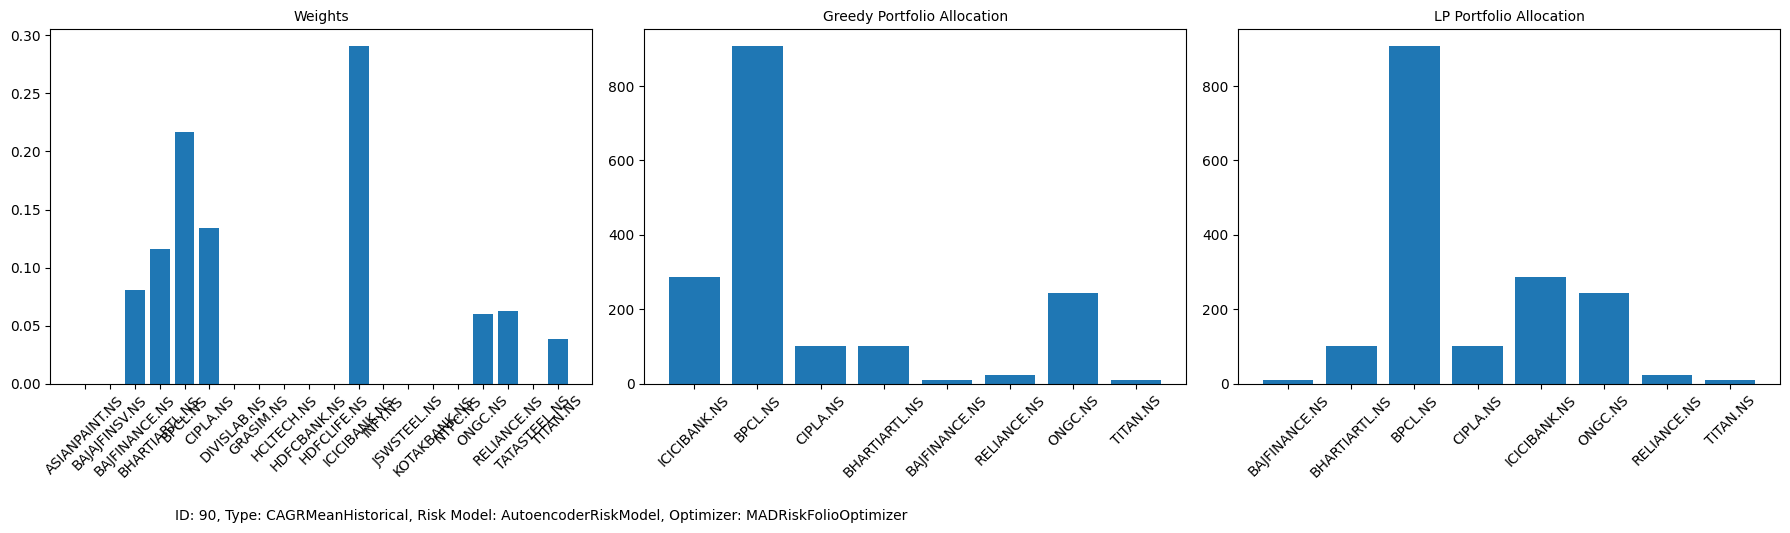

In [198]:
plot(best_volatility)
plot_bar(best_volatility)

Row 874:


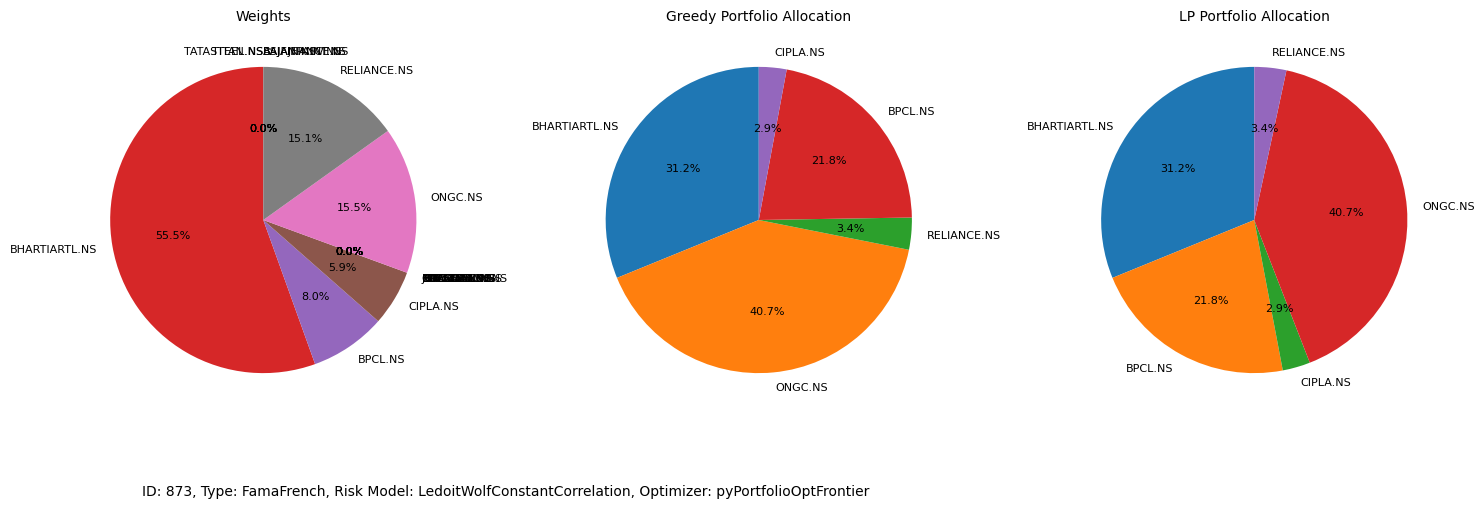

Row 221:


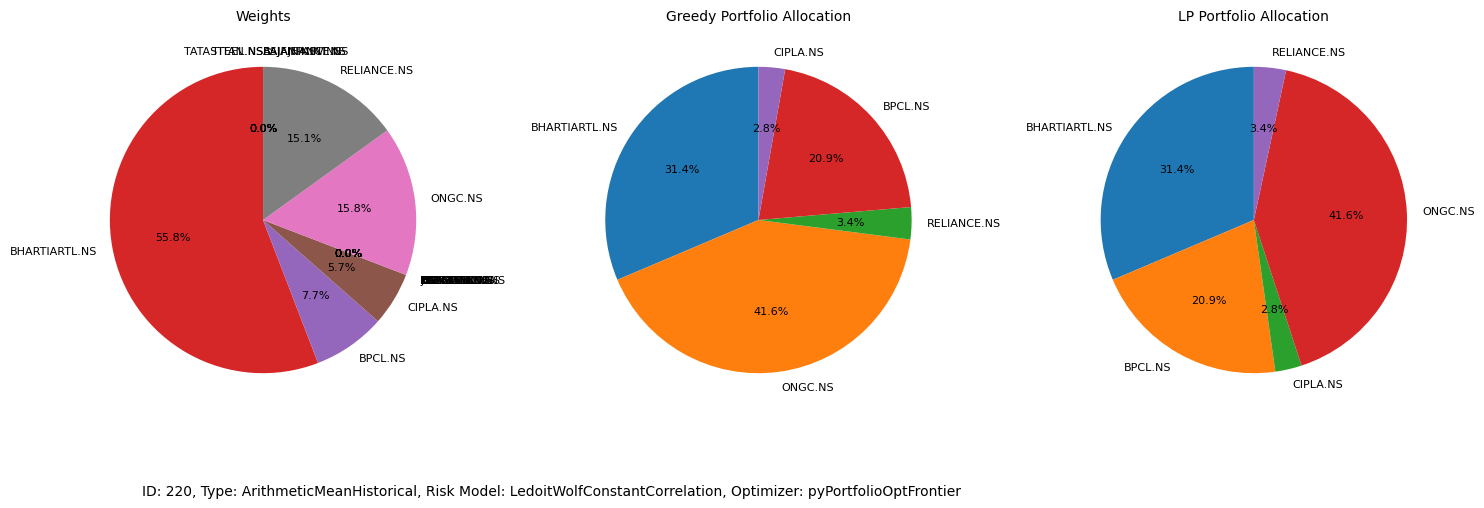

Row 1195:


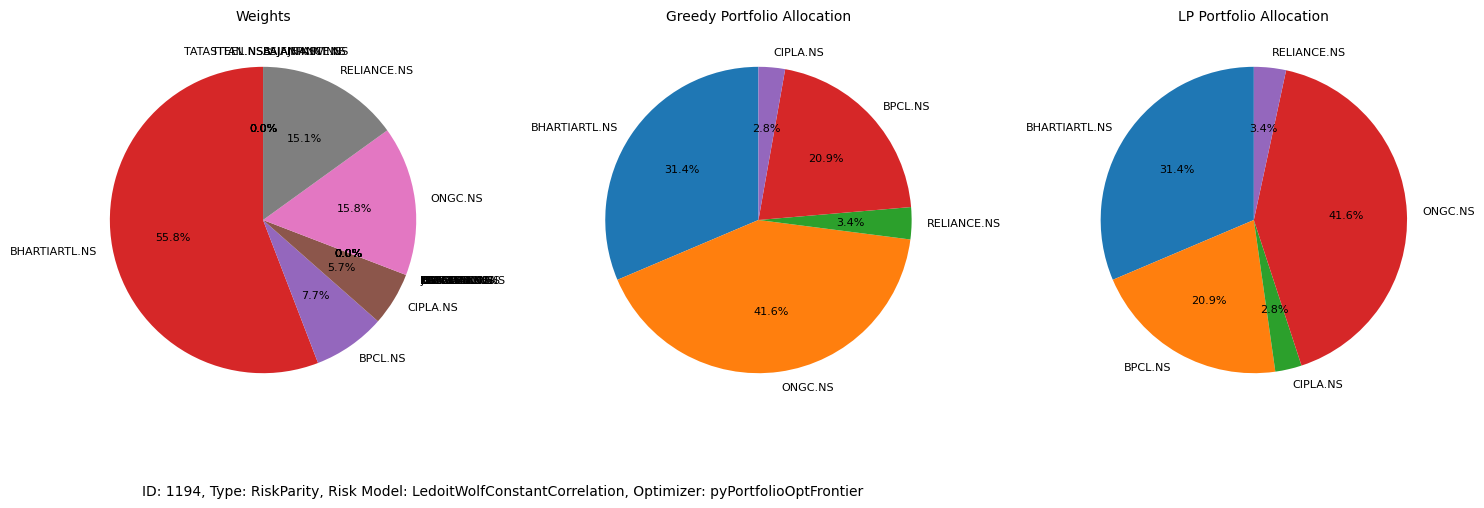

Row 668:


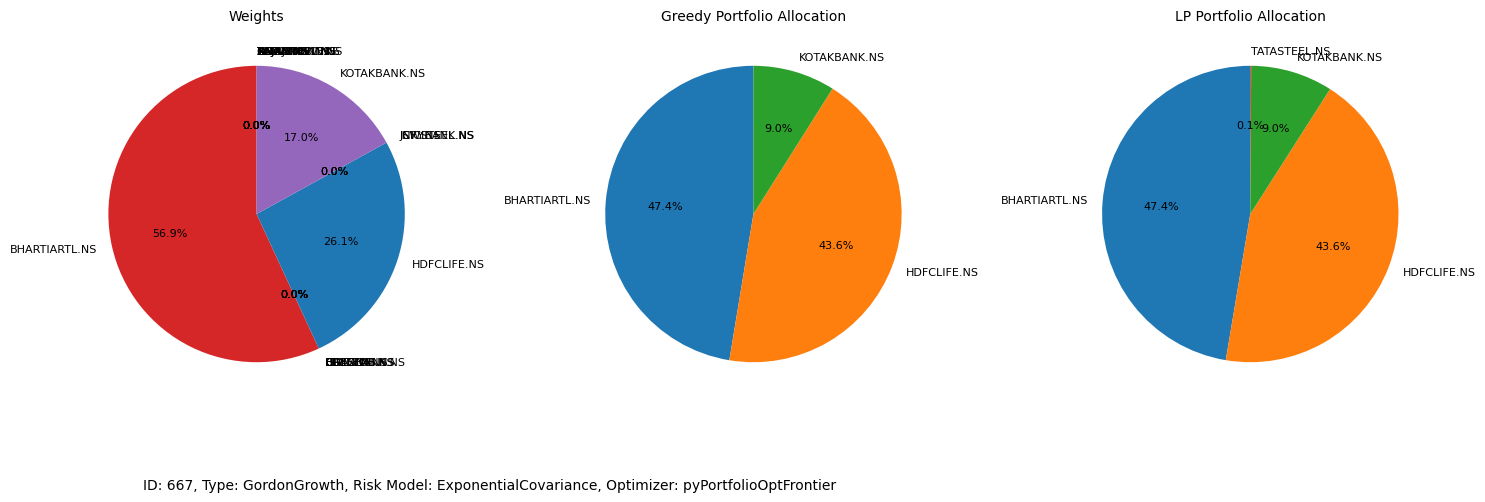

Row 647:


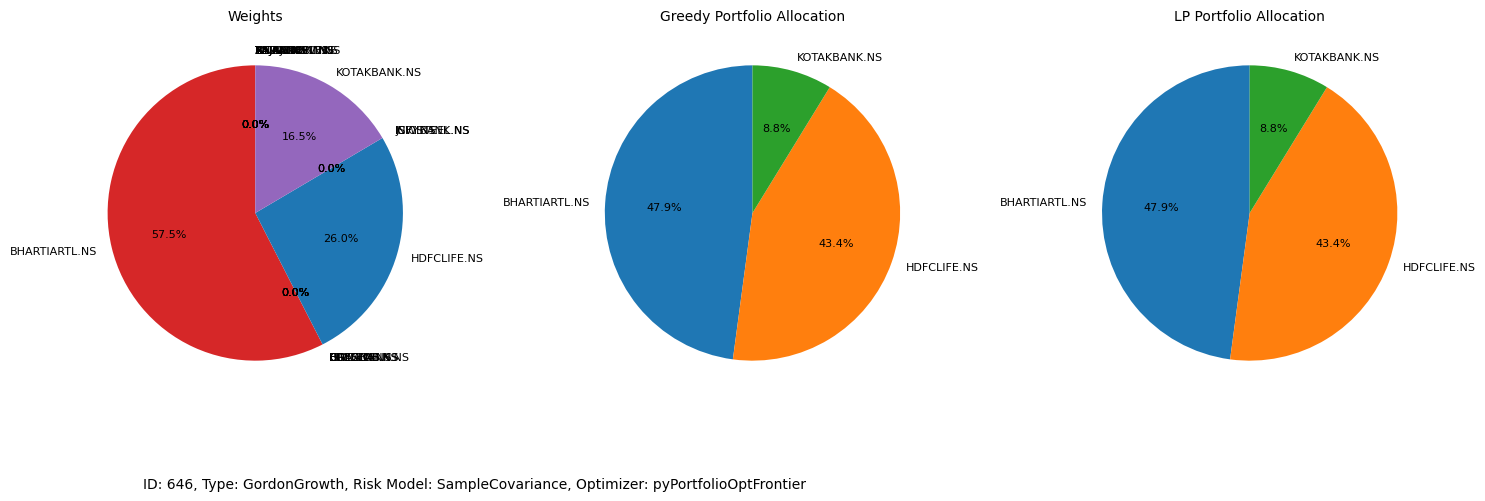

Row 701:


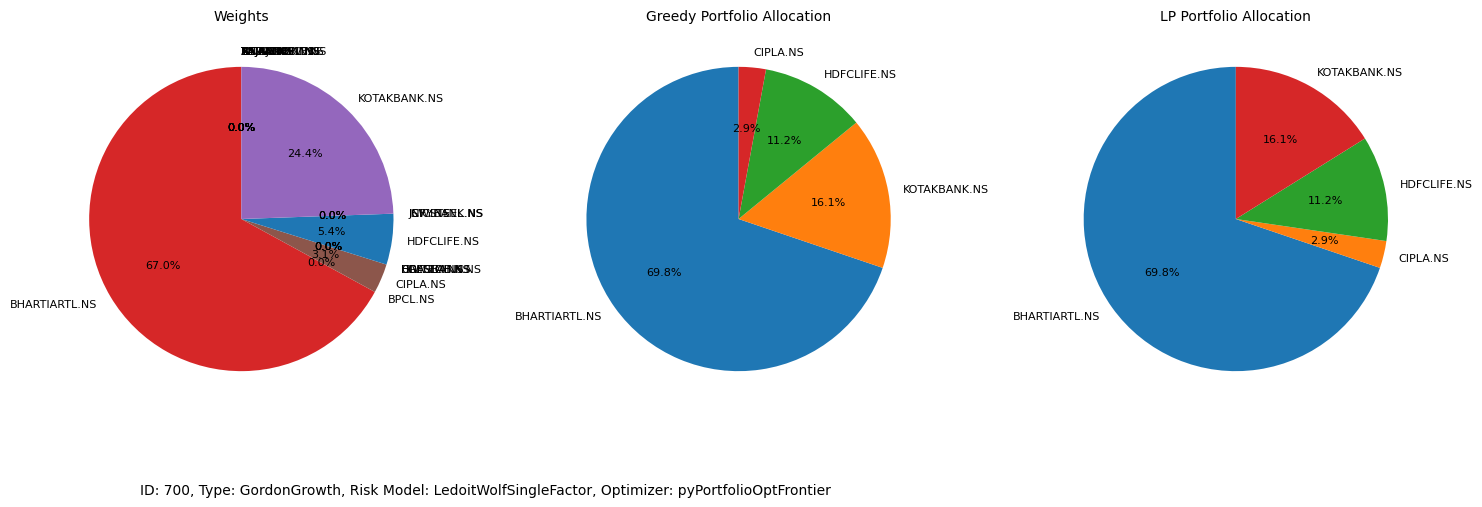

Row 723:


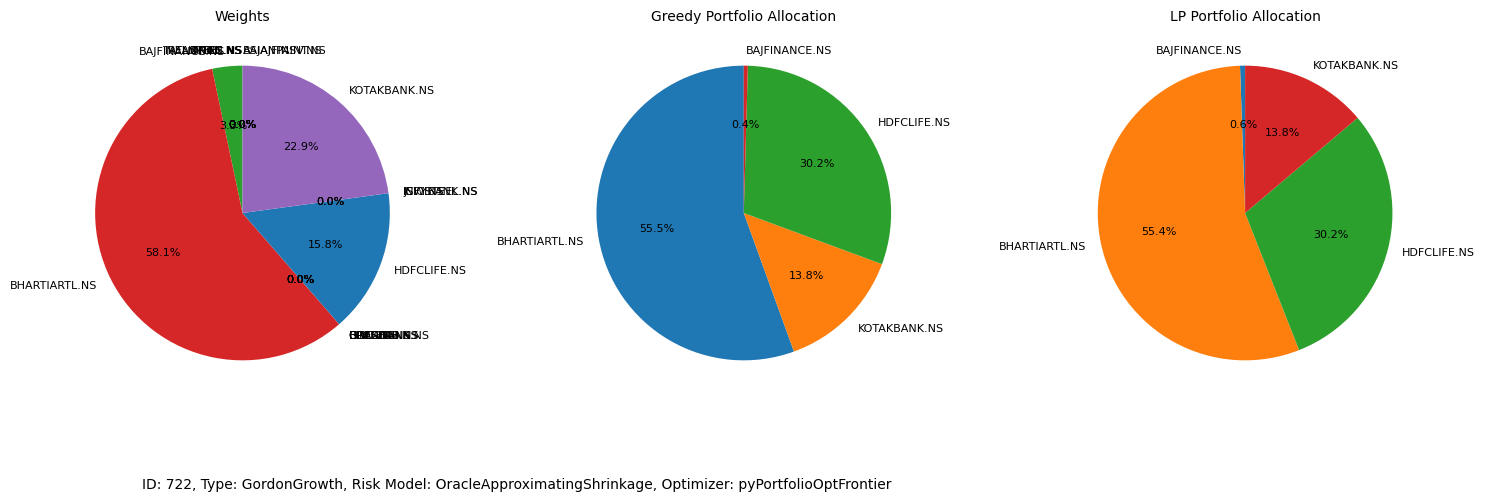

Row 712:


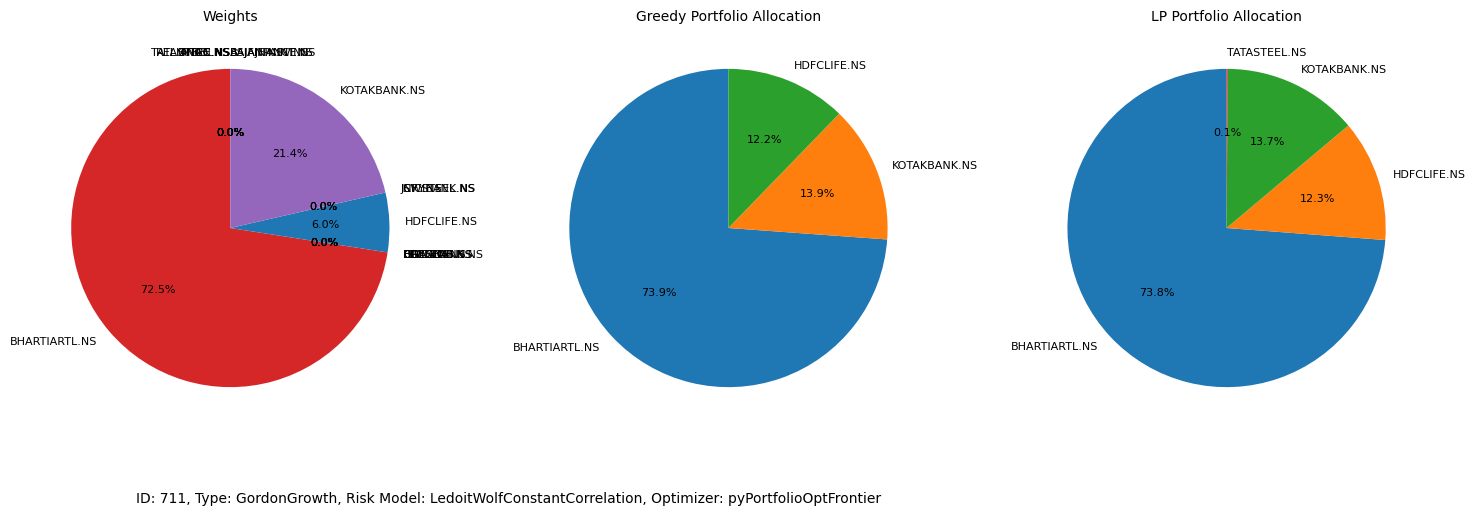

Row 679:


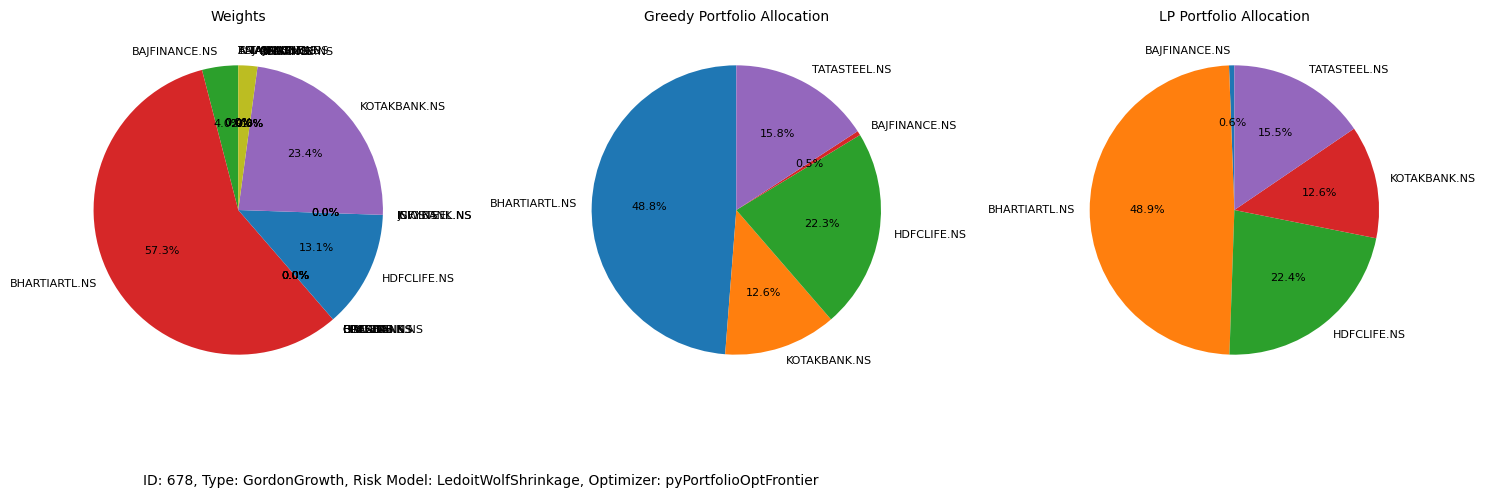

Row 690:


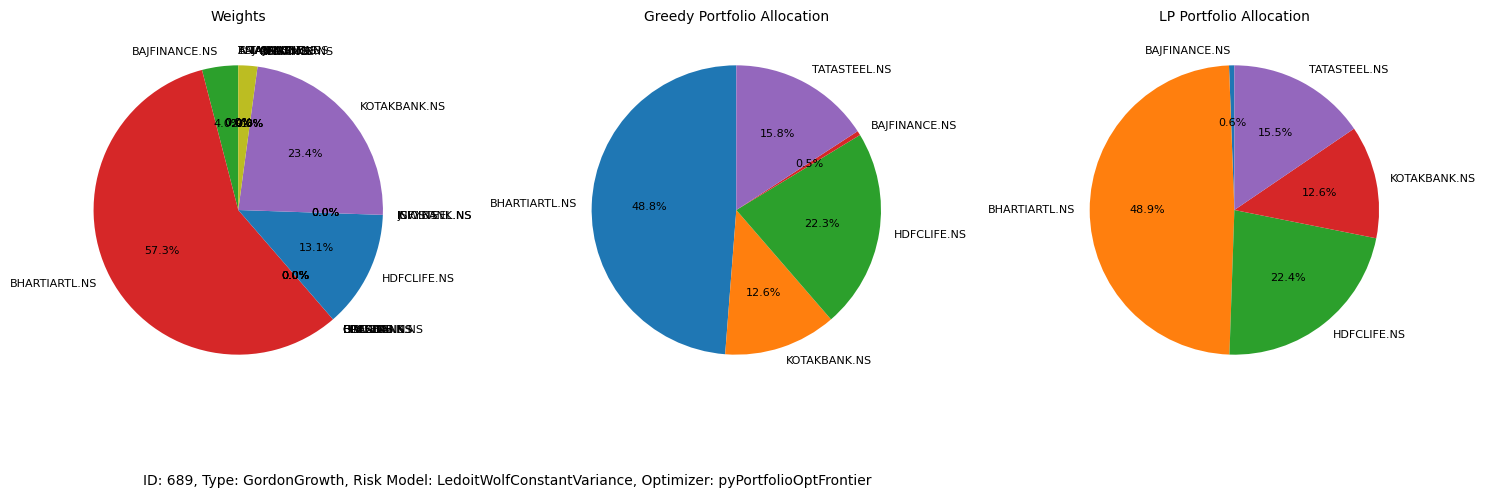

Row 874:


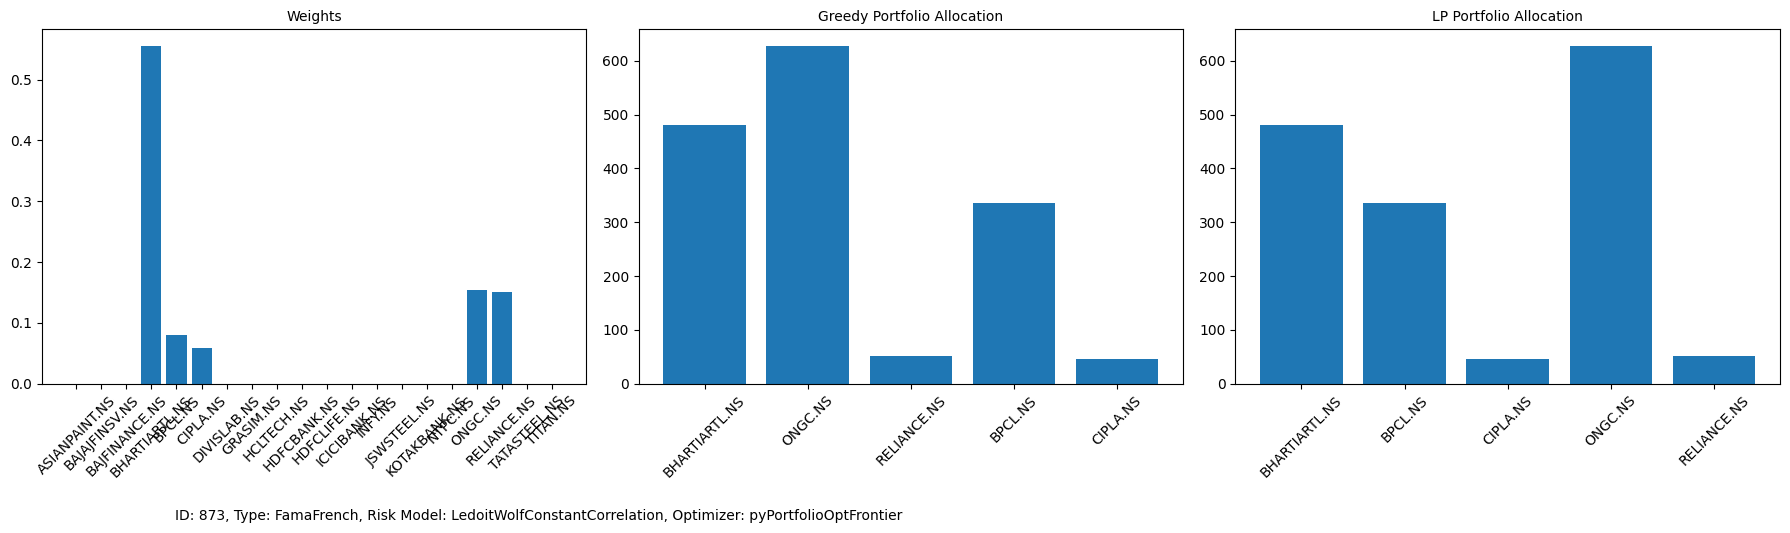

Row 221:


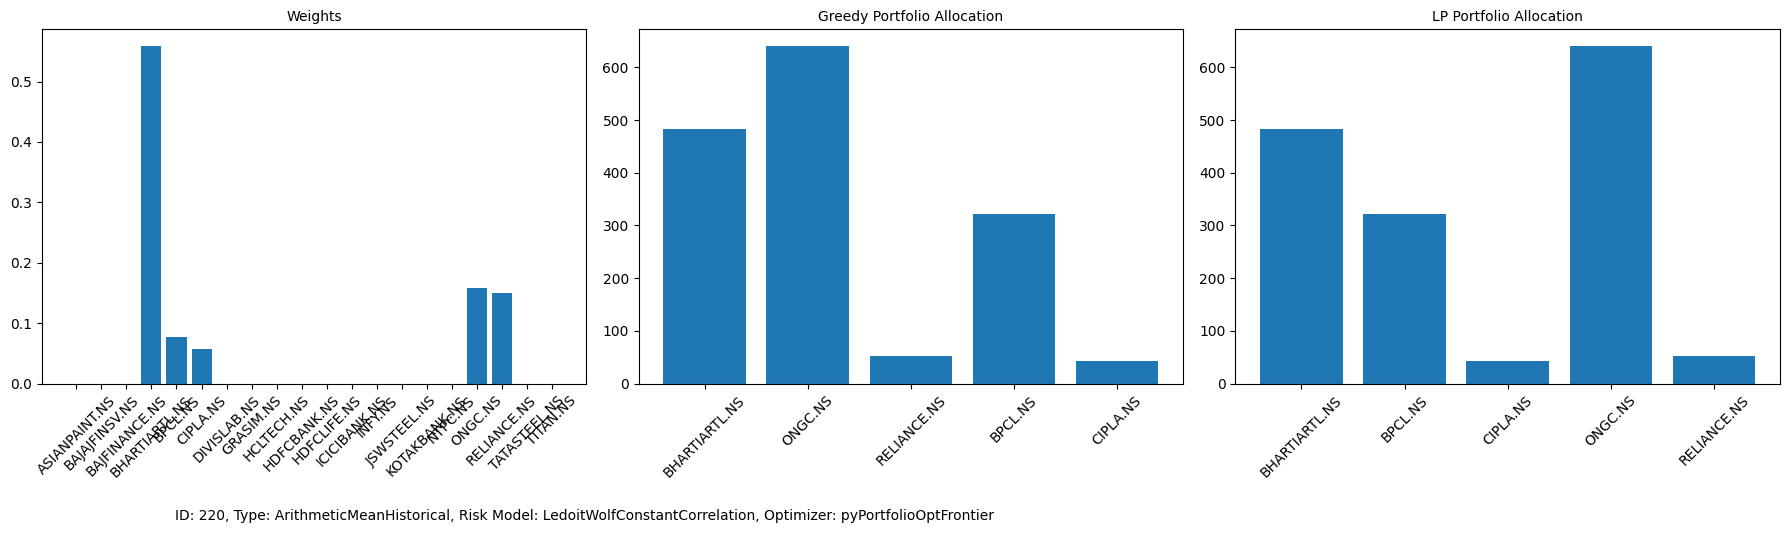

Row 1195:


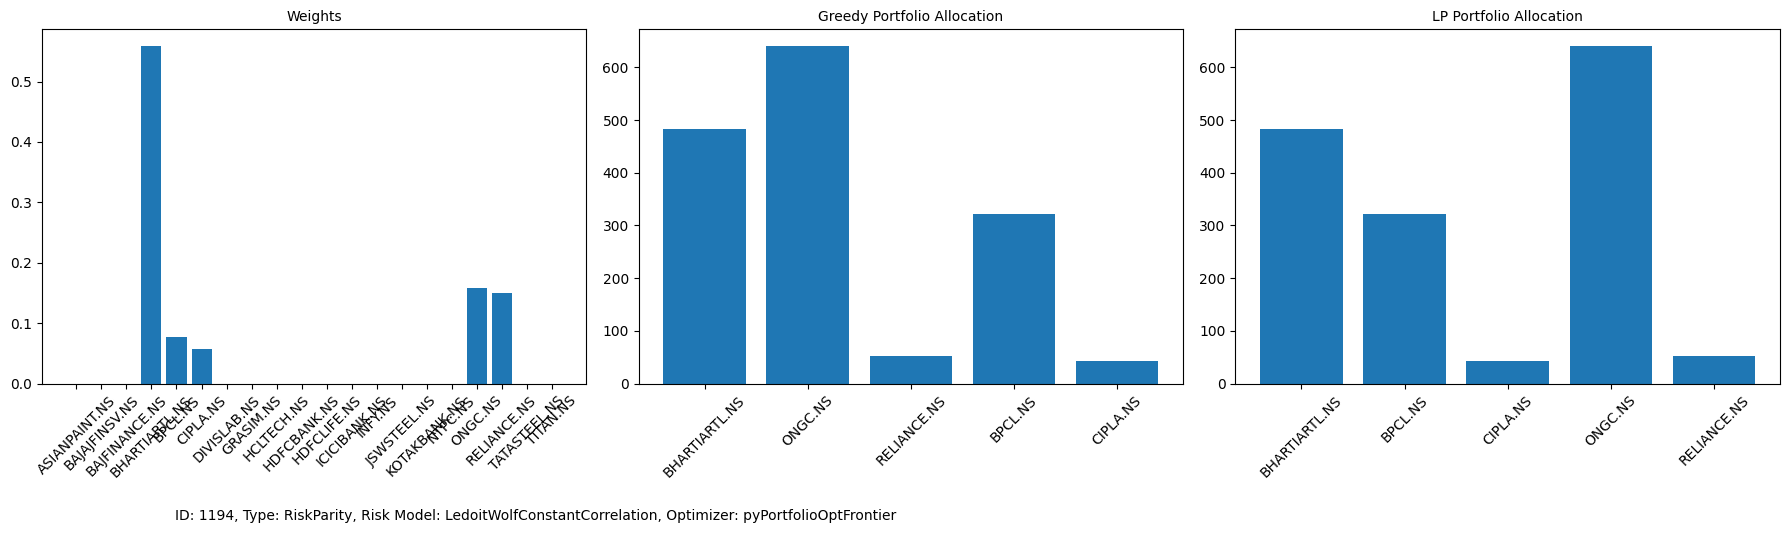

Row 668:


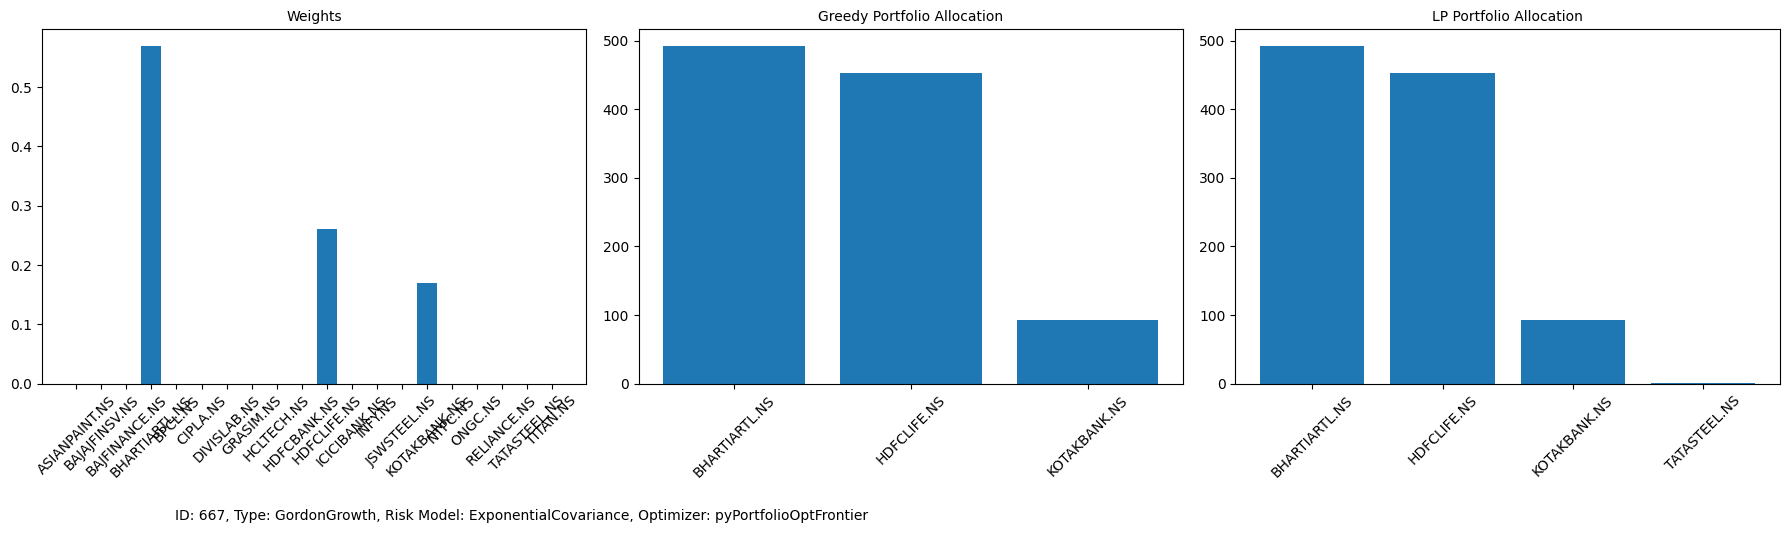

Row 647:


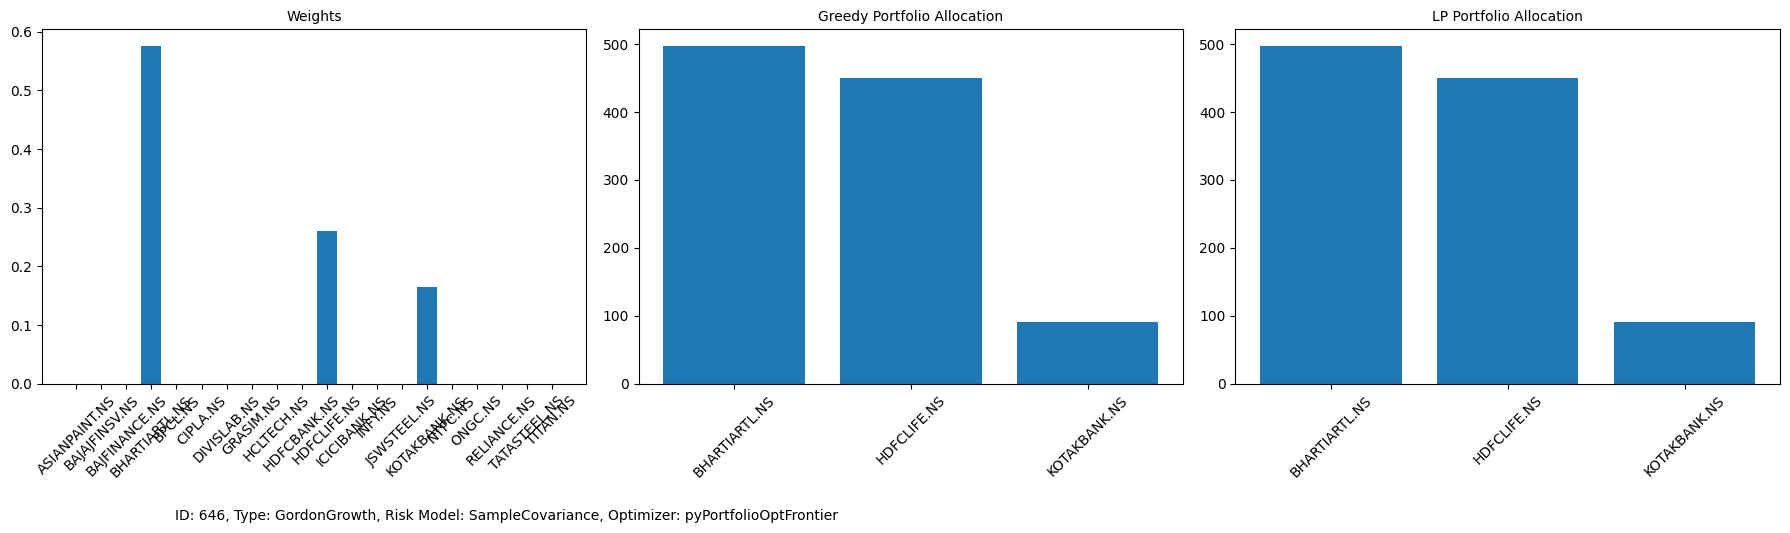

Row 701:


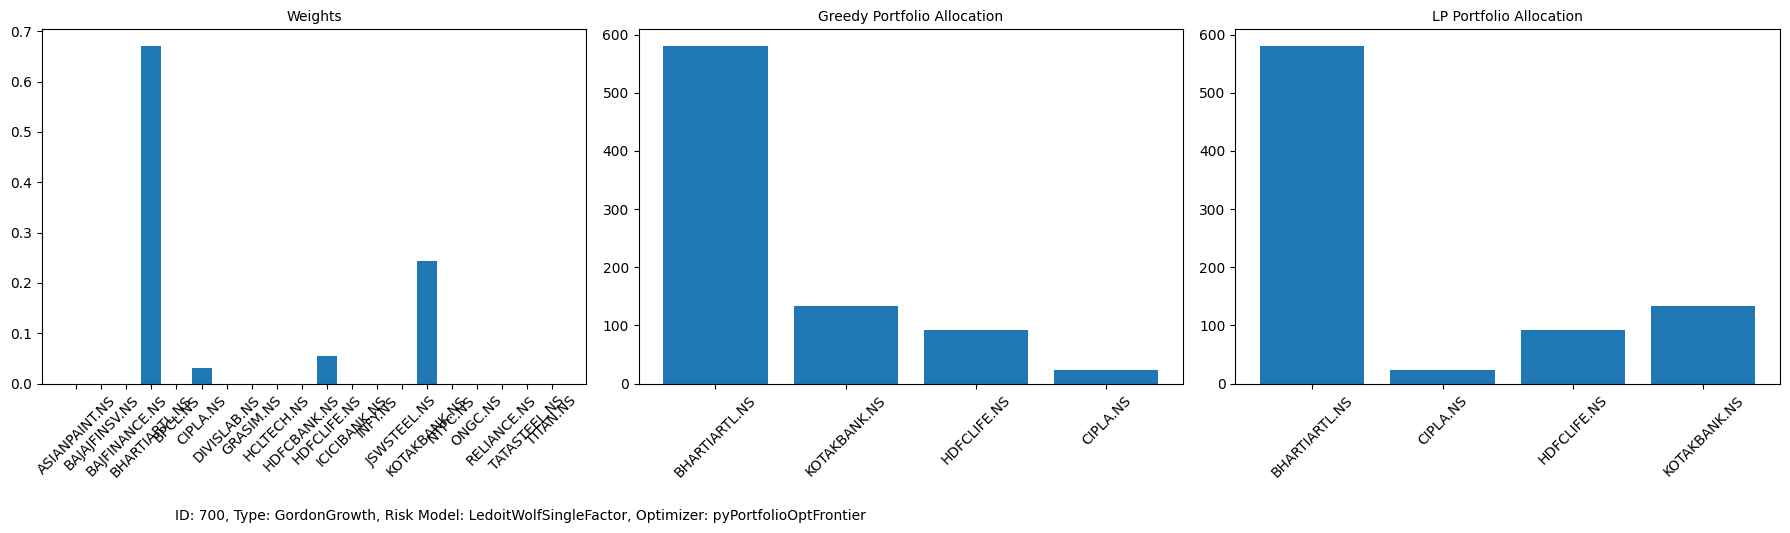

Row 723:


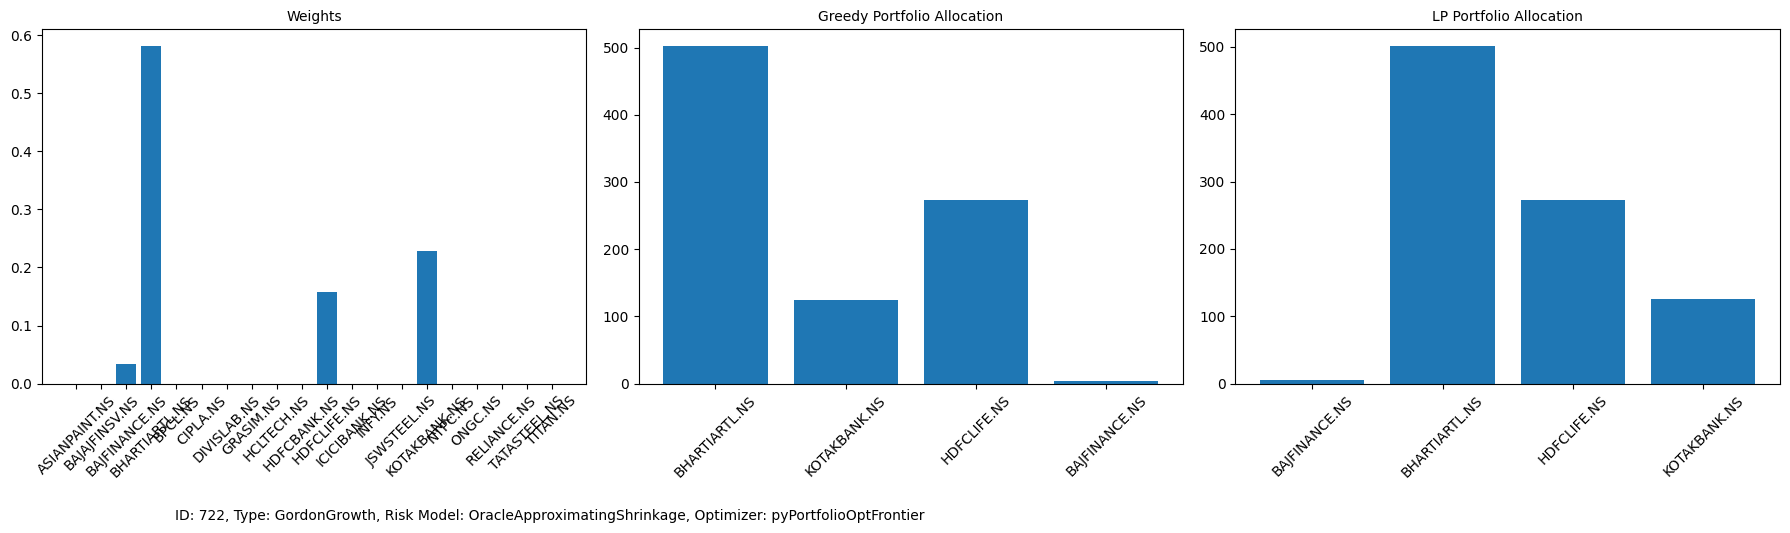

Row 712:


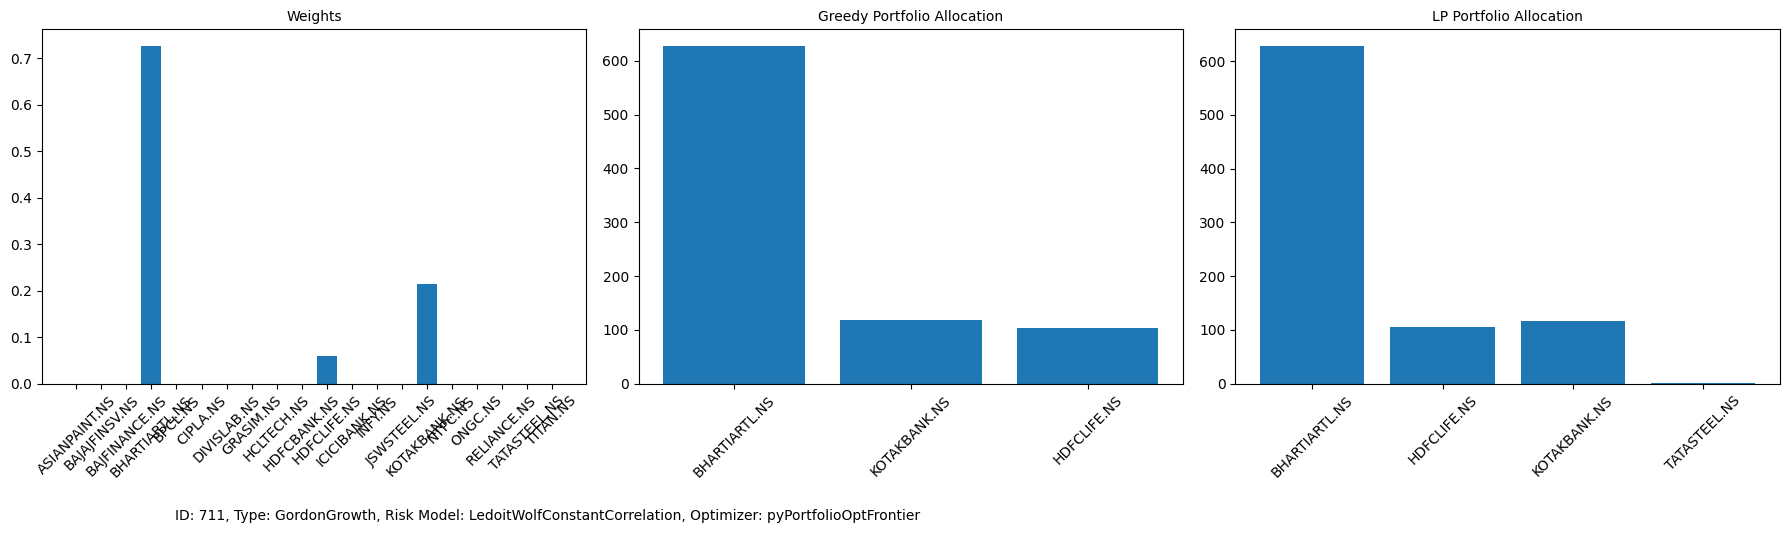

Row 679:


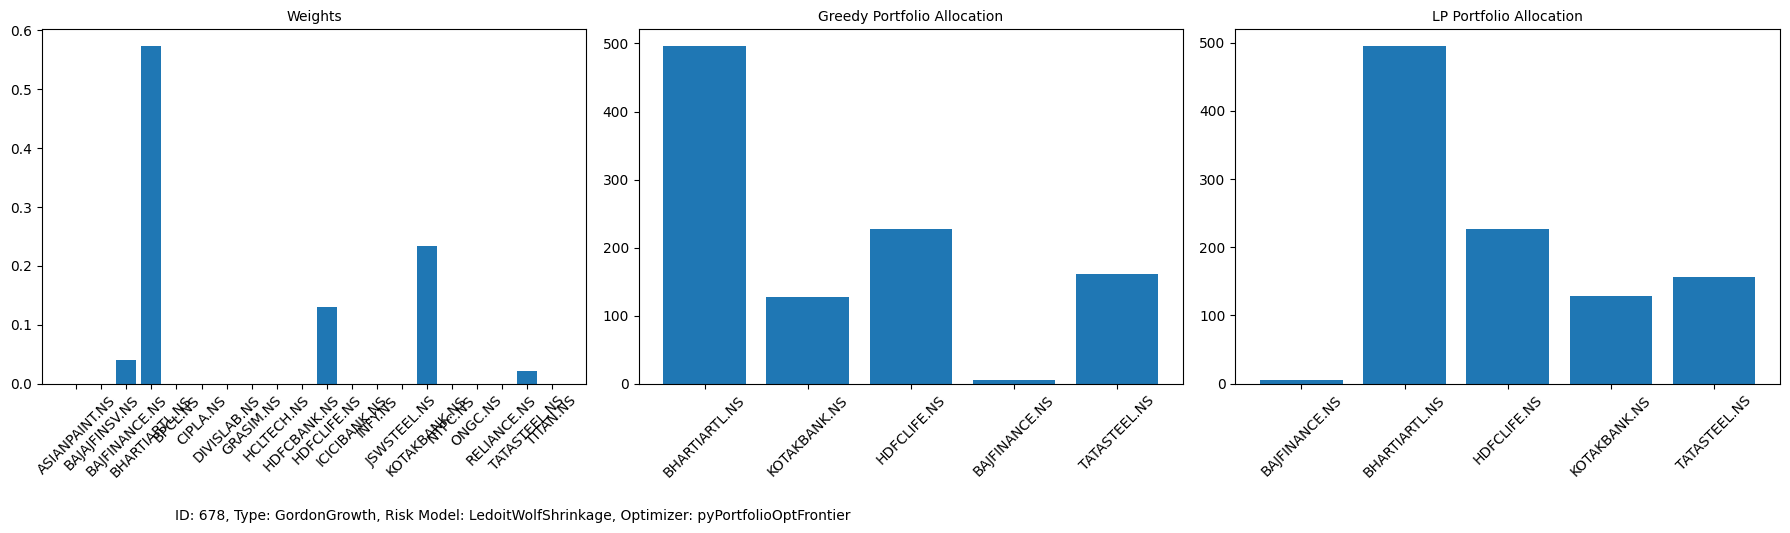

Row 690:


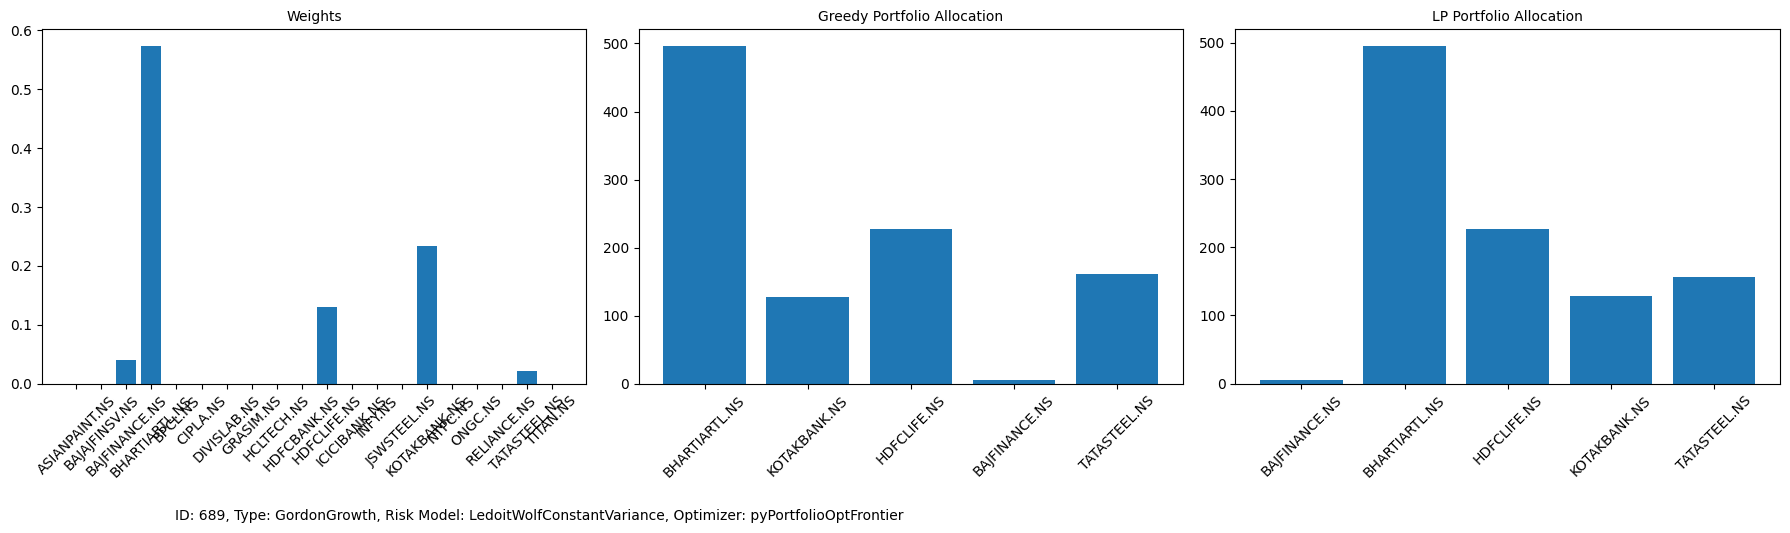

In [199]:
plot(best_sharpe)
plot_bar(best_sharpe)